# <center>💻 INTRODUCTION TO MACHINE LEARNING (by Prof. Krystyn Gutu) 💻</center>
# <center>📈 PROJECT 3: Heart Failure Predictions 📊</center>
## <center>CRN: 74016 | FALL 2023</center>
## <center>Submitted by: Piyush Gupta</center>

### Libraries Overview

1. **Numpy (np)**: A fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

2. **Pandas (pd)**: An open-source data manipulation and analysis library. It offers data structures and operations for manipulating numerical tables and time series, making data manipulation and analysis more accessible.

3. **Seaborn (sns)**: A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

4. **Matplotlib.pylab (plt)**: Part of the Matplotlib library, it offers a procedural interface to the matplotlib object-oriented plotting library. It's used for creating static, animated, and interactive visualizations in Python.

5. **Sklearn.ensemble RandomForestClassifier**: A part of the Scikit-learn library, this is used for building a forest of decision trees for solving classification and regression problems. It's known for its high accuracy and ability to handle large datasets with higher dimensionality.

6. **Sklearn.feature_selection (SelectKBest, chi2, f_classif)**: These functions are used for feature selection to improve model performance. SelectKBest selects features according to the k highest scores, while chi2 and f_classif are scoring functions for classification tasks.

7. **Sklearn.linear_model LogisticRegression**: A classification algorithm that is used to predict the probability of a categorical dependent variable.

8. **Sklearn.metrics**: This module includes score functions, performance metrics, and pairwise metrics and distance computations. It includes:
   - *accuracy_score*: Measures the accuracy of predictions.
   - *auc*: Computes the area under the ROC curve.
   - *classification_report*: Builds a text report showing the main classification metrics.
   - *confusion_matrix*: Computes the confusion matrix to evaluate classification accuracy.
   - *f1_score*: Computes the F1 score, a balance between precision and recall.
   - *precision_recall_curve*: Computes precision-recall pairs for different probability thresholds.
   - *precision_score*: Computes the precision of predictions.
   - *recall_score*: Computes the recall.
   - *roc_auc_score*: Computes the area under the ROC curve.
   - *roc_curve*: Computes the receiver operating characteristic curve.
   - *RocCurveDisplay*: ROC Curve visualization.

9. **Sklearn.model_selection**: This module includes model selection and evaluation tools, like:
   - *GridSearchCV*: Exhaustive search over specified parameter values for an estimator.
   - *RandomizedSearchCV*: Randomized search on hyper parameters.
   - *RepeatedStratifiedKFold*: Repeated Stratified K-Fold cross-validator.
   - *StratifiedKFold*: Stratified K-Folds cross-validator.
   - *train_test_split*: Splits arrays or matrices into random train and test subsets.
   - *cross_val_score*: Evaluate a score by cross-validation.

10. **Sklearn.preprocessing RobustScaler**: Scales features using statistics that are robust to outliers.

11. **Sklearn.tree DecisionTreeClassifier**: A decision tree classifier for classifying data.

12. **Xgboost XGBClassifier**: An implementation of gradient boosted decision trees designed for speed and performance.

13. **Eli5**: A library for debugging/inspecting machine learning classifiers and explaining their predictions.

14. **Lime (Local Interpretable Model-agnostic Explanations)**: A module for explaining machine learning classifiers with local surrogate models.

15. **Shap (SHapley Additive exPlanations)**: A game-theoretic approach to explain the output of any machine learning model.

16. **Warnings**: This module is used to show warnings to the developer about various events like deprecation, runtime, and user-defined.

17. **Display Options and Settings**:
    - pd.options.display.float_format: Sets the floating point display format for pandas.
    - warnings.filterwarnings('ignore'): Ignores warnings.
    - %matplotlib inline: Magic command in Jupyter to display matplotlib plots inline.


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, auc, classification_report, confusion_matrix, f1_score, precision_recall_curve)
from sklearn.metrics import (precision_score, recall_score, roc_auc_score, roc_curve, RocCurveDisplay)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold, StratifiedKFold)
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
import eli5
from eli5.sklearn import PermutationImportance, explain_weights_sklearn
import lime
from lime.lime_tabular import LimeTabularExplainer
import shap
import warnings
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing Dataset

**The dataset for exploration, modeling, and interpretability, explainability is called "Heart failure clinical records Data Set" to be found at the UCI (University California Irvine) Machine Learning Repository.**

**The dataset is loaded into a pandas DataFrame df from a CSV file named 'heart_failure_clinical_records_dataset.csv'.**

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df#displaying the contents of the "Heart failure clinical records Data Set".

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75.00        0                       582         0                 20   
1   55.00        0                      7861         0                 38   
2   65.00        0                       146         0                 20   
3   50.00        1                       111         0                 20   
4   65.00        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294 62.00        0                        61         1                 38   
295 55.00        0                      1820         0                 38   
296 45.00        0                      2060         1                 60   
297 45.00        0                      2413         0                 38   
298 50.00        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00              1.90           130    1   
1                      0  263358.03              1.10           136    1   
2                      0  162000.00              1.30           129    1   
3                      0  210000.00              1.90           137    1   
4                      0  327000.00              2.70           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00              1.10           143    1   
295                    0  270000.00              1.20           139    0   
296                    0  742000.00              0.80           138    0   
297                    0  140000.00              1.40           140    1   
298                    0  395000.00              1.60           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

**This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.**

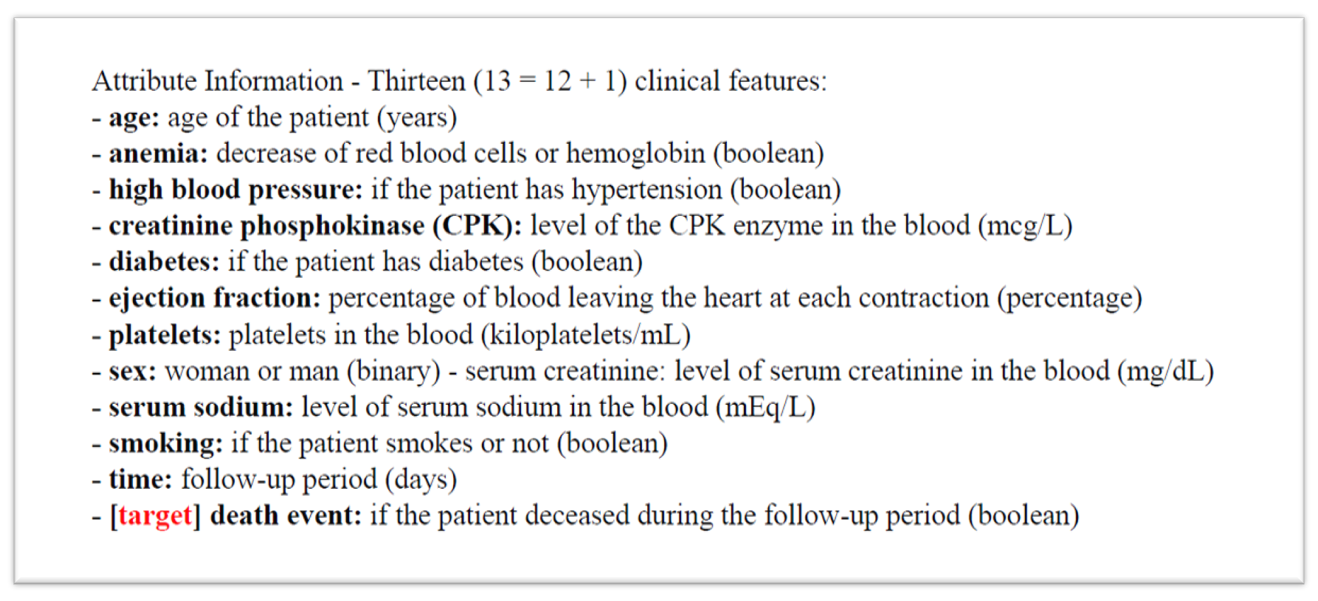

# <center>📈 1.Explanatory Data Analysis 📊</center>

###  Perform Explanatory Data Analysis (EDA) / indicate how features correlate among themselves, with emphasis to the target/label one

### 1. Checking the shape of the dataset - 

**The shape attribute of a DataFrame returns a tuple representing the dimensionality of the DataFrame. The first element of the tuple is the number of rows, and the second element is the number of columns.**


In [4]:
df.shape

(299, 13)

### 2. Concise summary of the DataFrame
**The df.info() method provides a concise summary of the DataFrame. This includes information like the number of non-null entries in each column, the datatype of each column, and memory usage, among others. It is particularly useful to get a quick overview of the dataset, helping identify missing values and optimize data types for more efficient storage and computation.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### 3. Viewing Data Types

**Executing df.dtypes returns a Series with the data type of each column. Understanding the data types of each column is crucial as it affects what kind of operations can be performed on the columns. It helps in identifying if any column needs a type conversion.**

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### 4.Statistical Summary - 
**The df.describe() method is used to generate a statistical summary of the DataFrame. This includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values for all numeric columns. It is a useful method for a quick statistical overview and to understand the distribution of the data in the DataFrame.**

In [7]:
df.describe().transpose()

count      mean      std      min       25%  \
age                      299.00     60.83    11.89    40.00     51.00   
anaemia                  299.00      0.43     0.50     0.00      0.00   
creatinine_phosphokinase 299.00    581.84   970.29    23.00    116.50   
diabetes                 299.00      0.42     0.49     0.00      0.00   
ejection_fraction        299.00     38.08    11.83    14.00     30.00   
high_blood_pressure      299.00      0.35     0.48     0.00      0.00   
platelets                299.00 263358.03 97804.24 25100.00 212500.00   
serum_creatinine         299.00      1.39     1.03     0.50      0.90   
serum_sodium             299.00    136.63     4.41   113.00    134.00   
sex                      299.00      0.65     0.48     0.00      0.00   
smoking                  299.00      0.32     0.47     0.00      0.00   
time                     299.00    130.26    77.61     4.00     73.00   
DEATH_EVENT              299.00      0.32     0.47     0.00      0.00   

                               50%       75%       max  
age                          60.00     70.00     95.00  
anaemia                       0.00      1.00      1.00  
creatinine_phosphokinase    250.00    582.00   7861.00  
diabetes                      0.00      1.00      1.00  
ejection_fraction            38.00     45.00     80.00  
high_blood_pressure           0.00      1.00      1.00  
platelets                262000.00 303500.00 850000.00  
serum_creatinine              1.10      1.40      9.40  
serum_sodium                137.00    140.00    148.00  
sex                           1.00      1.00      1.00  
smoking                       0.00      1.00      1.00  
time                        115.00    203.00    285.00  
DEATH_EVENT                   0.00      1.00      1.00

### 5. Identifying Duplicates: -

**Checks for duplicated rows in the dataset (df.duplicated()) and prints the count of such rows (duplicate.sum()) and also displays the duplicate rows (df[duplicate]). This step is crucial for data quality, as duplicates can skew the results of analyses.**

In [8]:
duplicate = df.duplicated() 
print(duplicate.sum()) 
df[duplicate] 

0


Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []

### 6. Checking for Missing Values

**It is used to count the number of missing values in each column of the DataFrame. Handling missing data is an essential step in preprocessing.**

In [9]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Double checking null values with help of heatmap**

<Axes: >

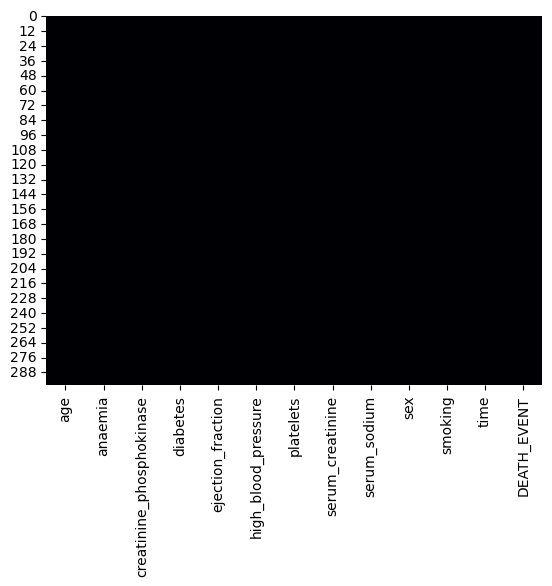

In [10]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

### The blank heatmap indicates that there are no null values.

### 7. Covariance Matrix:

**The covariance matrix of the dataset is computed and printed. Covariance indicates the direction of the linear relationship between variables.**

In [11]:
print('Covariance:')
df.cov()

Covariance:


age  anaemia  creatinine_phosphokinase  \
age                         141.49     0.52                   -941.59   
anaemia                       0.52     0.25                    -91.82   
creatinine_phosphokinase   -941.59   -91.82                 941458.57   
diabetes                     -0.59    -0.00                     -4.62   
ejection_fraction             8.46     0.19                   -506.17   
high_blood_pressure           0.53     0.01                    -32.75   
platelets                -60907.12 -2124.54                2321533.14   
serum_creatinine              1.96     0.03                    -16.47   
serum_sodium                 -2.41     0.09                    254.96   
sex                           0.37    -0.02                     37.02   
smoking                       0.10    -0.02                      1.10   
time                       -206.86    -5.45                   -703.80   
DEATH_EVENT                   1.41     0.02                     28.46   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                          -0.59               8.46                 0.53   
anaemia                      -0.00               0.19                 0.01   
creatinine_phosphokinase     -4.62            -506.17               -32.75   
diabetes                      0.24              -0.03                -0.00   
ejection_fraction            -0.03             140.06                 0.14   
high_blood_pressure          -0.00               0.14                 0.23   
platelets                  4454.93           83545.24              2336.48   
serum_creatinine             -0.02              -0.14                -0.00   
serum_sodium                 -0.20               9.19                 0.08   
sex                          -0.04              -0.84                -0.02   
smoking                      -0.03              -0.37                -0.01   
time                          1.29              38.33                -7.29   
DEATH_EVENT                  -0.00              -1.49                 0.02   

                             platelets  serum_creatinine  serum_sodium  \
age                          -60907.12              1.96         -2.41   
anaemia                       -2124.54              0.03          0.09   
creatinine_phosphokinase    2321533.14            -16.47        254.96   
diabetes                       4454.93             -0.02         -0.20   
ejection_fraction             83545.24             -0.14          9.19   
high_blood_pressure            2336.48             -0.00          0.08   
platelets                9565668749.45          -4168.40      26810.44   
serum_creatinine              -4168.40              1.07         -0.86   
serum_sodium                  26810.44             -0.86         19.47   
sex                           -5851.10              0.00         -0.06   
smoking                        1291.45             -0.01          0.01   
time                          79811.07            -11.99         30.01   
DEATH_EVENT                   -2247.62              0.14         -0.40   

                              sex  smoking     time  DEATH_EVENT  
age                          0.37     0.10  -206.86         1.41  
anaemia                     -0.02    -0.02    -5.45         0.02  
creatinine_phosphokinase    37.02     1.10  -703.80        28.46  
diabetes                    -0.04    -0.03     1.29        -0.00  
ejection_fraction           -0.84    -0.37    38.33        -1.49  
high_blood_pressure         -0.02    -0.01    -7.29         0.02  
platelets                -5851.10  1291.45 79811.07     -2247.62  
serum_creatinine             0.00    -0.01   -11.99         0.14  
serum_sodium                -0.06     0.01    30.01        -0.40  
sex                          0.23     0.10    -0.58        -0.00  
smoking                      0.10     0.22    -0.83        -0.00  
time                        -0.58    -0.83  6023.97       -19.13  
DEATH_E

### 8. Unique Value Count per Column

**Count the number of unique values in each column. This helps in identifying columns with a high degree of variability, as well as those that might be categorical in nature..**

In [12]:
df.nunique(axis=0)

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

### 9. Unique Values in Target Variable

**lists the unique values in the 'DEATH_EVENT' column, likely the target variable indicating heart failure events.**

In [13]:
df['DEATH_EVENT'].unique() 

array([1, 0], dtype=int64)

In [14]:
df.columns # displays all column names in the DataFrame, helping to understand the dataset's features.

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

### 10. Descriptive Statistics by Target Class:

**Creates descriptive statistics separated by the values of the 'DEATH_EVENT' column and visualizes them using heatmaps. It compares the mean values of features for patients who had heart failure during the follow-up period and those who did not. This visualization helps in understanding how different features vary with the outcome.**

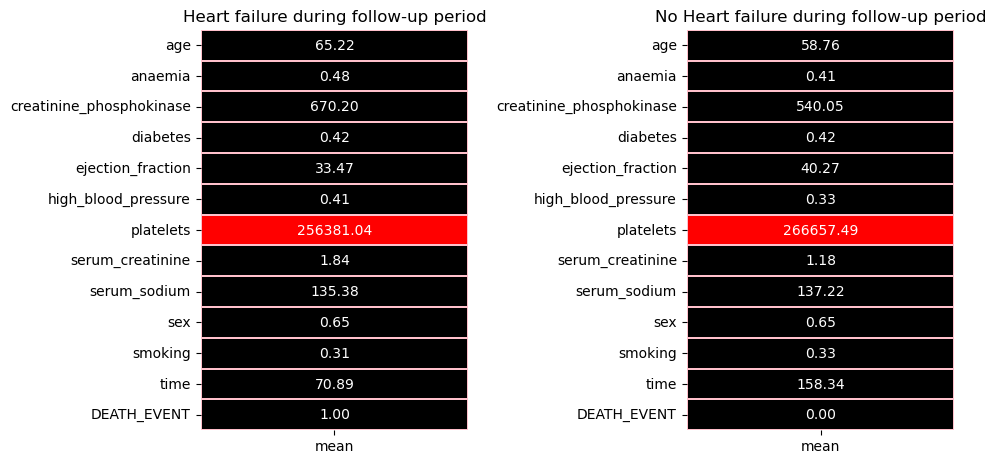

In [15]:
yes = df[df['DEATH_EVENT'] == 1].describe().T
no = df[df['DEATH_EVENT'] == 0].describe().T
colors = ['#000000', '#FF0000']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
# Plotting the heatmap for 'yes'
plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=1.2, linecolor='pink', cbar=False, fmt='.2f')
plt.title('Heart failure during follow-up period')
# Plotting the heatmap for 'no'
plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=1.2, linecolor='pink', cbar=False, fmt='.2f')
plt.title('No Heart failure during follow-up period')
fig.tight_layout(pad=2)
plt.show()

The heatmaps provide a comparative statistical summary of clinical and demographic variables for patients during a follow-up period, differentiated by the occurrence of a heart failure event.

### Heart Failure Event Occurrence Analysis
The heatmap on the left represents patients who experienced a heart failure event (DEATH_EVENT = 1). Each row corresponds to a different variable, such as age, diabetes, or blood pressure, and the color intensity reflects the mean value of these variables for the patients who had a heart failure event. For instance, we observe higher mean values for creatinine_phosphokinase and platelets among these patients.

### No Heart Failure Event Occurrence Analysis
The heatmap on the right illustrates the same variables for patients who did not experience a heart failure event (DEATH_EVENT = 0). It allows us to directly compare the mean values of each variable against those who did have an event. For example, the mean age appears slightly lower for patients without a heart failure event, as well as a lower mean value for serum_creatinine.

### Comparative Insights
- By comparing the two heatmaps, we can identify which variables differ significantly between the two groups. 
- Variables like creatinine_phosphokinase and platelets demonstrate higher mean values in the heart failure group, which could suggest a correlation with the occurrence of heart failure events.
- The DEATH_EVENT row at the bottom of each heatmap confirms the segmentation, with a mean value of 1 for the heart failure group and 0 for the non-heart failure group, as expected.

These heatmaps are a useful tool for preliminary analysis, visually highlighting the differences in mean values of clinical and demographic variables between patients with and without heart failure events. This can help in identifying potential risk factors associated with heart failure.


### 11. Feature Classification:

**Classifies features into categorical and numerical based on the number of unique values. This classification is crucial for subsequent data processing and analysis.**

In [16]:
columns = list(df.columns)
categorical_features = []
numerical_features = []
for i in columns:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('Categorical Features :',categorical_features)
print('Numerical Features :',numerical_features)

Categorical Features : ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
Numerical Features : ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


In [17]:
df.head(10) #Displays the first 10 rows of the DataFrame, providing a glimpse into the data.

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0 75.00        0                       582         0                 20   
1 55.00        0                      7861         0                 38   
2 65.00        0                       146         0                 20   
3 50.00        1                       111         0                 20   
4 65.00        1                       160         1                 20   
5 90.00        1                        47         0                 40   
6 75.00        1                       246         0                 15   
7 60.00        1                       315         1                 60   
8 65.00        0                       157         0                 65   
9 80.00        1                       123         0                 35   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00              1.90           130    1   
1                    0  263358.03              1.10           136    1   
2                    0  162000.00              1.30           129    1   
3                    0  210000.00              1.90           137    1   
4                    0  327000.00              2.70           116    0   
5                    1  204000.00              2.10           132    1   
6                    0  127000.00              1.20           137    1   
7                    0  454000.00              1.10           131    1   
8                    0  263358.03              1.50           138    0   
9                    1  388000.00              9.40           133    1   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1  
5        1     8            1  
6        0    10            1  
7        1    10            1  
8        0    10            1  
9        1    10            1

### 12. Target Variable Distribution:

**Visualizes the distribution of the 'DEATH_EVENT' target variable using a pie chart and a count plot. Such visualizations are key in understanding the balance or imbalance in the target classes**

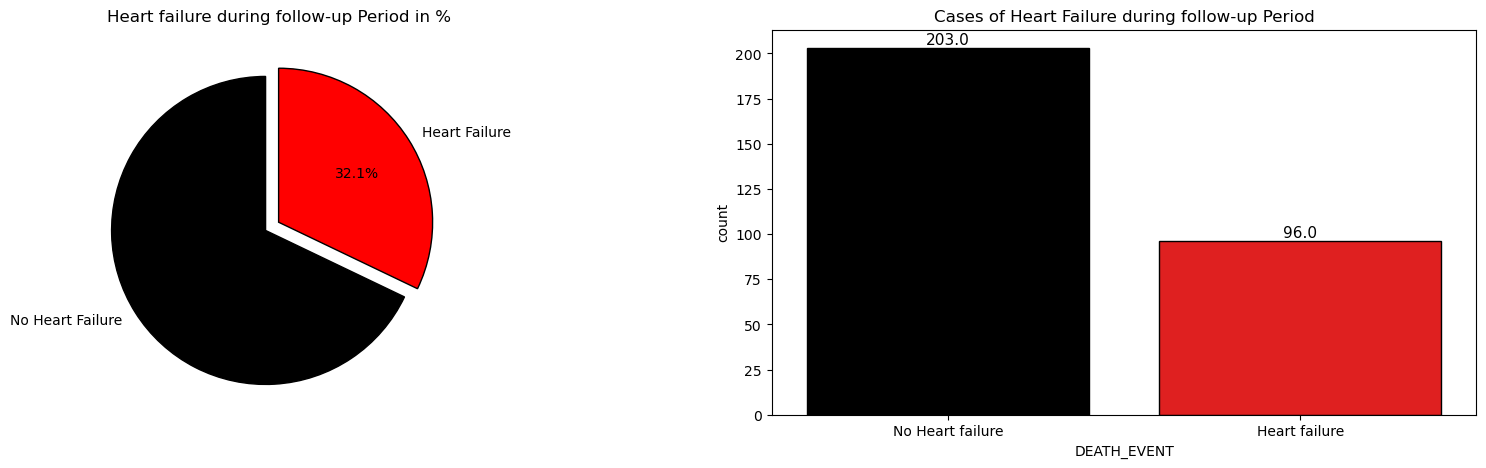

In [18]:
l = list(df['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Failure','Heart Failure'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart failure during follow-up Period in %');

plt.subplot(1,2,2)
ax = sns.countplot(x = 'DEATH_EVENT',data = df,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart failure','Heart failure'])
plt.title('Cases of Heart Failure during follow-up Period');
plt.show()

Represent the distribution of heart failure events during a follow-up period.

### Pie Chart Analysis
The pie chart on the left side of the figure illustrates the percentage of patients who experienced heart failure against those who did not. The chart is divided into two segments:
- The **red segment** corresponds to patients who had a heart failure event, accounting for 32.1% of the total.
- The **black segment** represents patients without a heart failure event during the follow-up period, making up the remaining 67.9%.

This visualization is particularly useful for quickly grasping the proportion of the total cases that are affected by heart failure.

### Bar Chart Analysis
The bar chart on the right side shows the actual number of cases, providing a clear, quantitative comparison.
- The **taller bar** signifies the 203 patients who did not experience a heart failure event.
- The **shorter bar** represents the 96 patients who did, clearly showing that fewer patients experienced heart failure events than those who did not.

The actual counts above each bar allow for a precise understanding of the distribution of the dataset.

These visualizations together offer a comprehensive overview of the heart failure event distribution, with the pie chart providing a percentage-based perspective and the bar chart offering exact counts.


### 13. Display Categorical Features:

In [19]:
categorical_features #Displays the list of features classified as categorical.

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

### 14. Distribution of heart failure events across different categorical variables

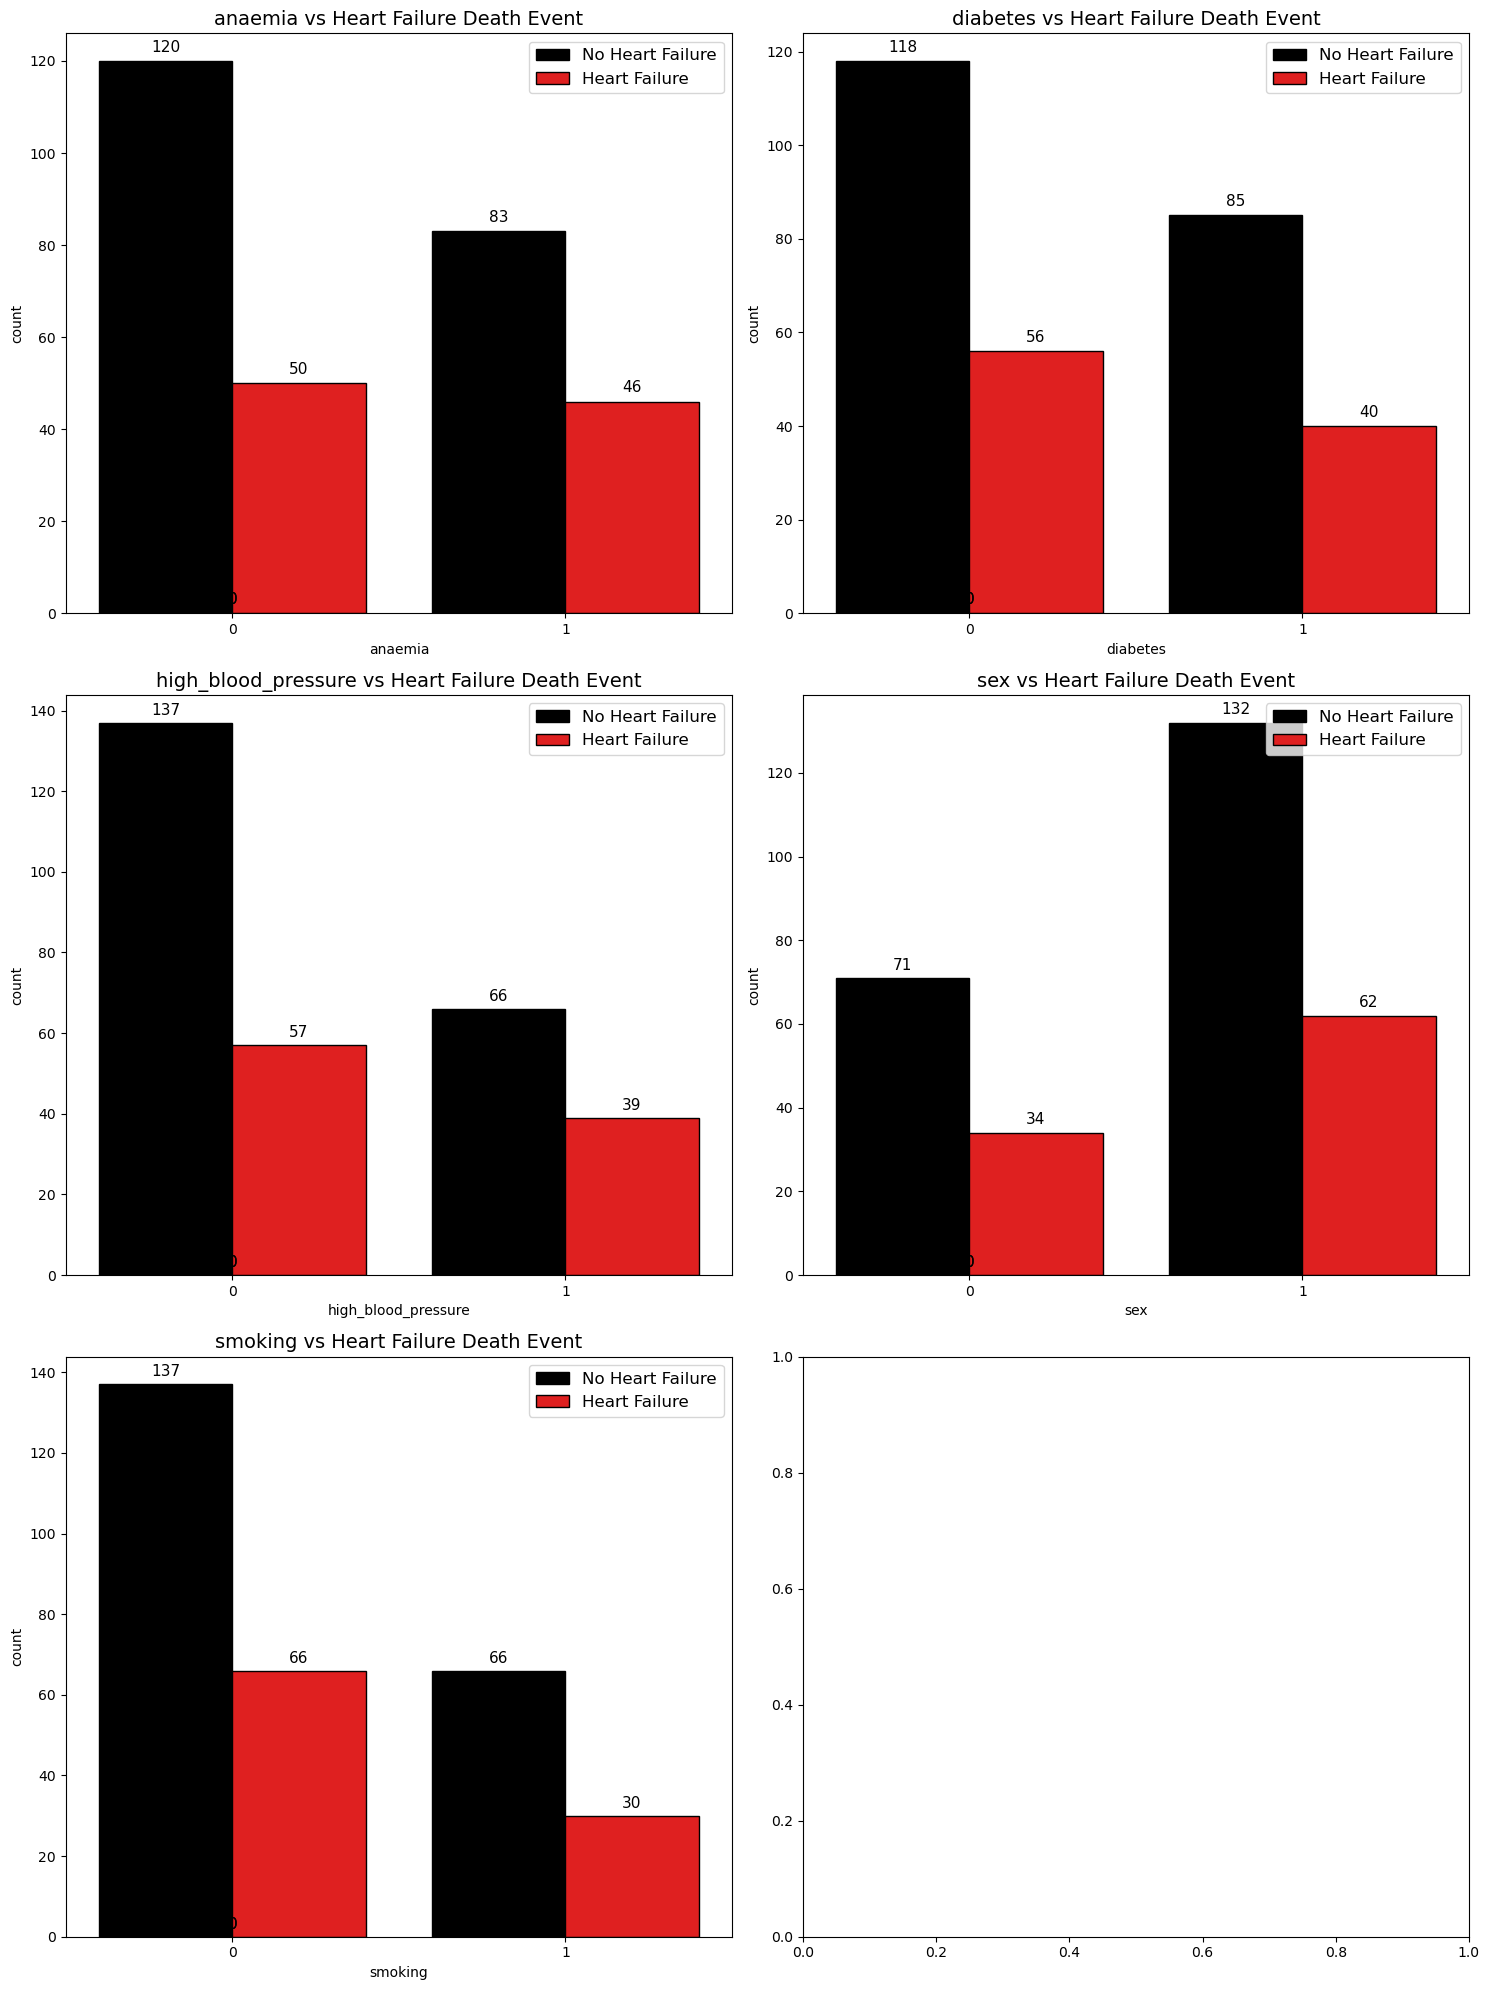

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
for i in range(len(categorical_features)-1):
    plt.subplot(3, 2, i + 1)
    ax = sns.countplot(x=categorical_features[i], data=df, hue="DEATH_EVENT", palette=colors, edgecolor='black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), 
                horizontalalignment='center', fontsize=11, color='black')
    title = categorical_features[i] + ' vs Heart Failure Death Event'
    plt.title(title, fontsize=14)
    plt.legend(['No Heart Failure', 'Heart Failure'], loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

The bar charts provide insights into the distribution of heart failure events across different categorical variables in the dataset.

### Insights:
- **Anaemia:** There is a noticeable increase in heart failure events among patients with anaemia.
- **Diabetes:** Diabetes does not show a significant difference in the distribution of heart failure events.
- **High Blood Pressure:** High blood pressure is associated with a higher number of heart failure events.
- **Sex:** A higher number of males experienced heart failure events compared to females.
- **Smoking:** Smoking status does not show a significant difference in heart failure events, with equal numbers for smokers and non-smokers in the heart failure category.

Each bar chart depicts the count of patients in two groups: those who experienced a heart failure event (red) and those who did not (black). This visual representation helps to identify potential risk factors associated with heart failure events.


**Filtering the DataFrame 'df' to include only the rows where the DEATH_EVENT column is 1, indicating that the patient had a heart failure event. Then we calculate the percentage of patients with and without anaemia, diabetes, high_blood_pressure, sex, and smoking who had a heart failure event.**

### 15. Heart Failure Event Counts with Anemia

**We count the number of patients with and without anemia**

In [21]:
df['anaemia'].value_counts()

anaemia
0    170
1    129
Name: count, dtype: int64

In [22]:
df[df['DEATH_EVENT'] == 1]['anaemia'].value_counts()

anaemia
0    50
1    46
Name: count, dtype: int64

In [23]:
anaemia = df[df['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

db = df[df['DEATH_EVENT'] == 1]['diabetes'].value_counts()
db = [db[0] / sum(db) * 100,db[1] / sum(db) * 100]

hbp = df[df['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = df[df['DEATH_EVENT'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smk = df[df['DEATH_EVENT'] == 1]['smoking'].value_counts()
smk = [smk[0] / sum(smk) * 100,smk[1] / sum(smk) * 100]

### 16. Visualization of Categorical Features:

**Pie charts are created for various categorical features (like 'Anaemia', 'Diabetes', 'High blood pressure', 'Sex', 'Smoking'), visualizing their distribution in the dataset. This provides insights into the characteristics of the patient population.**

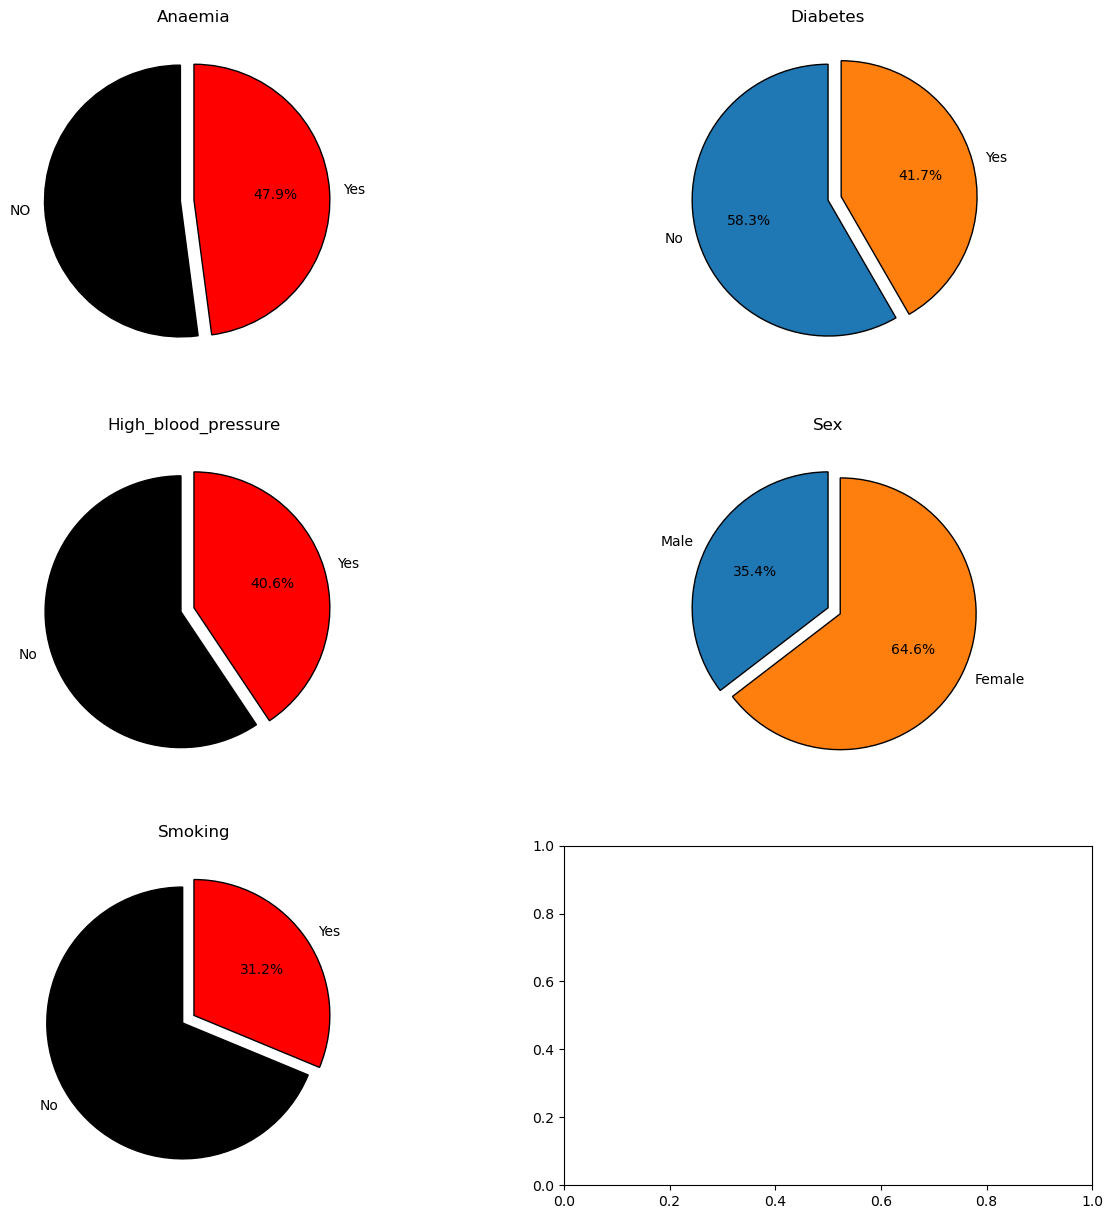

In [24]:
ax,fig = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(x = anaemia,labels = ['NO','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Anaemia');

plt.subplot(3,2,2)
plt.pie(x = db,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes');

plt.subplot(3,2,3)
plt.pie(x = hbp,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('High_blood_pressure');

plt.subplot(3,2,4)
plt.pie(x= sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,5)
plt.pie(x = smk,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smoking');

The pie charts presented above offer a visual representation of the proportion of heart failure patients with specific conditions or characteristics.

### Anaemia:
- The first chart shows the distribution of patients with and without anaemia. A slight majority of patients do not have anaemia.

### Diabetes:
- The second chart compares the proportion of patients with and without diabetes. Patients are nearly evenly split on this condition.

### High Blood Pressure:
- The third chart reveals that a little over 40% of the patients have high blood pressure, which is a significant proportion.

### Sex:
- The fourth chart categorizes patients by sex, with a majority being female.

### Smoking:
- The final chart illustrates that less than a third of the patients are smokers.

### Insights:
- These pie charts are valuable for understanding the distribution of various risk factors or characteristics among heart failure patients.
- The distribution of conditions such as anaemia and diabetes shows a relatively even split among the heart failure patients, which may suggest the need for further analysis to understand their impact on heart failure.
- The high proportion of patients with high blood pressure underscores its prevalence among those who have experienced heart failure events.
- The sex distribution indicates a predominance of females in the patient group.
- The smoking status representation suggests that non-smokers are more prevalent in this patient population.



### Now we plot distribution plot (distplot) where we represent both numerical and categorical data in histogram form:

### 17. Distribution Plots for Categorical Features:

**Distribution plots are generated for each categorical feature.This step is key in understanding the frequency distribution of categorical features.**

In [25]:
categorical_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

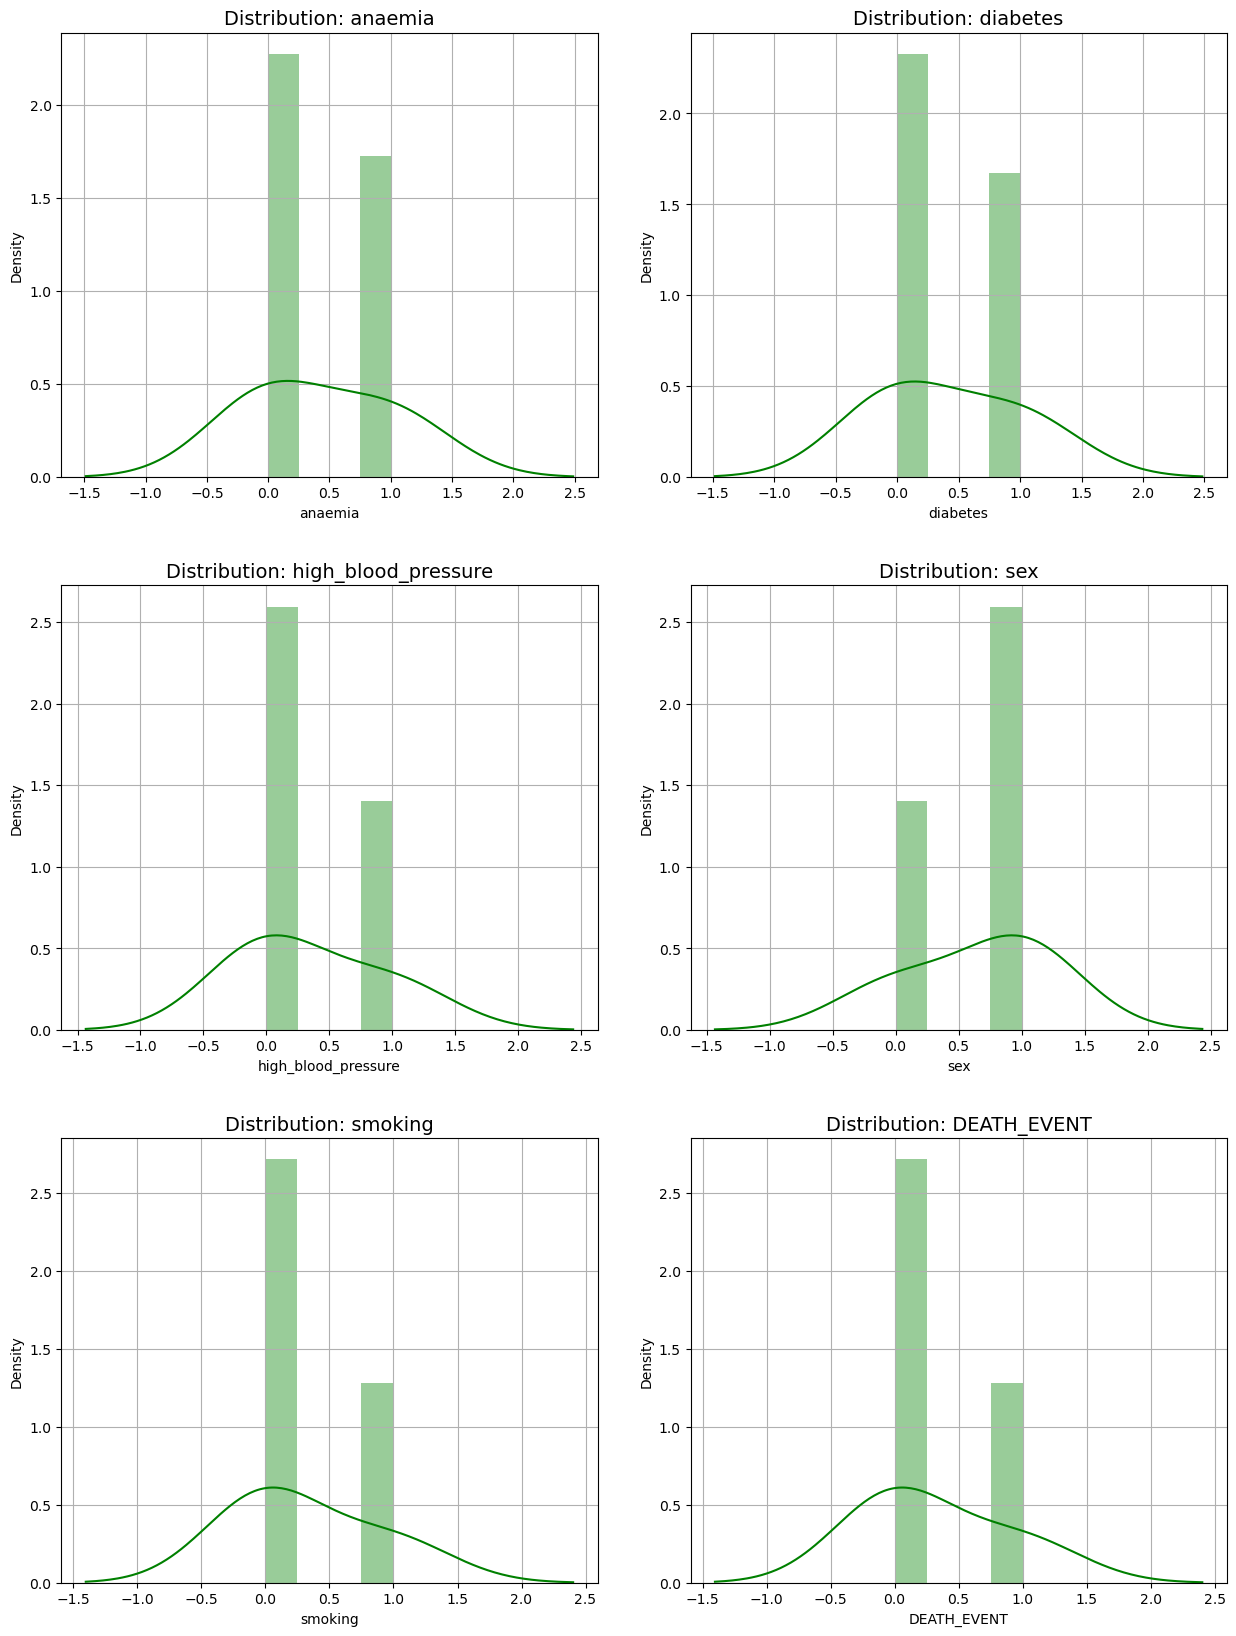

In [26]:
plot_color = 'green'
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(13, 17))

for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.distplot(df[feature], kde_kws={'bw': 1}, color=plot_color)
    plt.title(f'Distribution: {feature}', fontsize=14)
    plt.grid(True)
    plt.tight_layout(pad=3.0)
    
if len(categorical_features) % 2 != 0:
    fig.delaxes(ax.flatten()[-1])

plt.show()

### Distribution Plots for Categorical Features

The series of plots above represent the frequency distributions of various categorical features within the dataset. These features are likely crucial in understanding the characteristics of the patient population and the incidence of heart failure events.

### Plots Overview:
- **Anaemia:** Indicates the distribution of patients with and without anaemia.
- **Diabetes:** Shows how many patients in the dataset have or do not have diabetes.
- **High Blood Pressure:** Visualizes the count of patients with high blood pressure compared to those without.
- **Sex:** Depicts the gender distribution within the patient group.
- **Smoking:** Presents the distribution of smokers versus non-smokers.
- **DEATH_EVENT:** Displays the occurrence of heart failure events.

### Insights:
- Each bar in the histograms represents a count of patients who have (right side of the plot) or do not have (left side of the plot) the condition described by the feature name.
- These plots are crucial for identifying the prevalence of each feature within the patient cohort and may help in preliminary analysis to determine potential risk factors for heart failure.
- The DEATH_EVENT distribution is particularly important, as it directly relates to the outcome of interest in heart failure studies.

These visualizations aid in understanding the frequency distribution of categorical features, which can be foundational for further statistical analysis and model building.


### 18. Distribution Plots for Numerical Features:

**Distribution plots are also created for numerical features, helping in understanding their spread and central tendencies.**

In [27]:
numerical_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

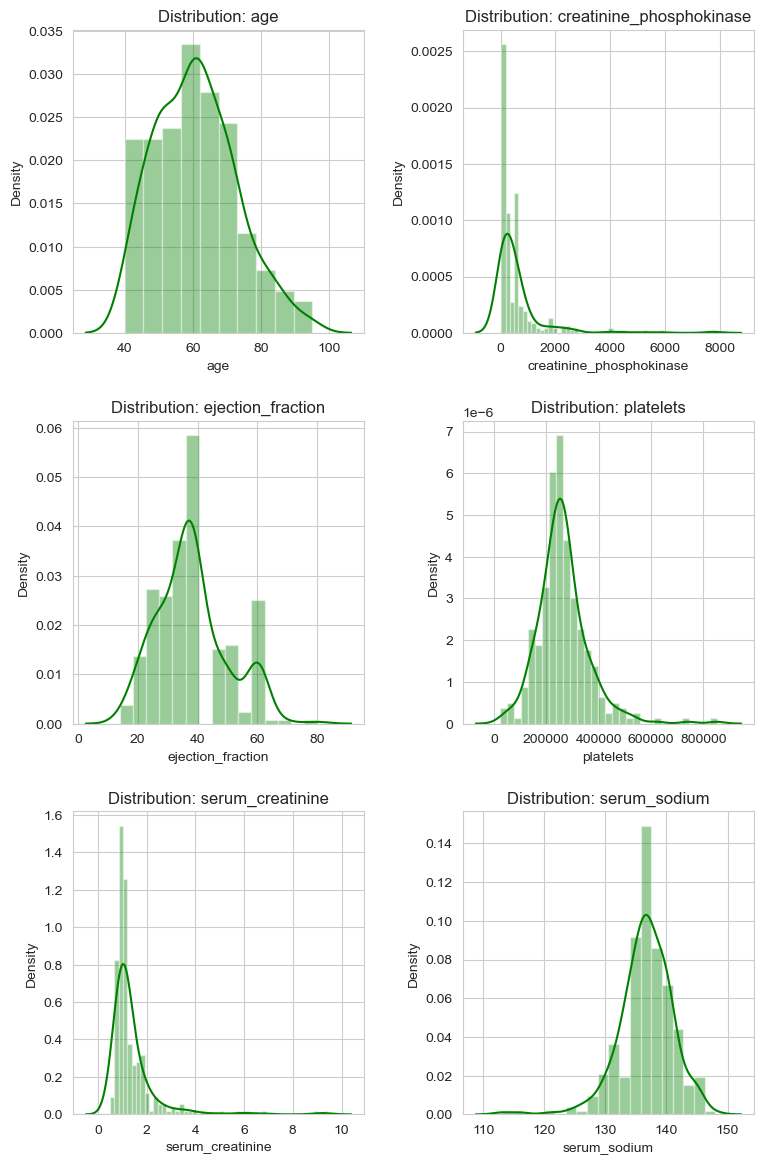

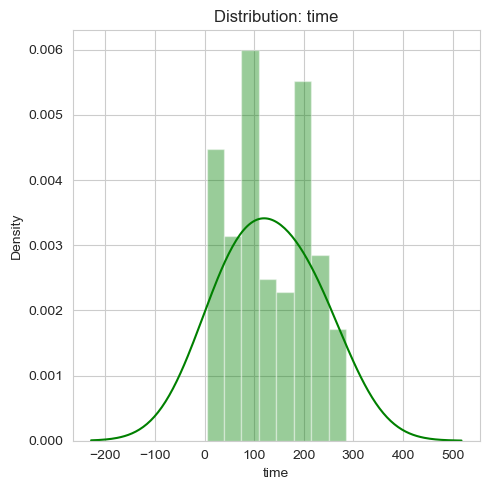

In [28]:
sns.set_style("whitegrid")
plot_color = 'green'
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
for i, feature in enumerate(numerical_features[:-1]):  # Exclude the last feature for the separate plot
    plt.subplot(3, 2, i+1)
    sns.distplot(df[feature], color=plot_color)
    plt.title(f'Distribution: {feature}', fontsize=12)
    plt.tight_layout(pad=2.0)  

plt.show()

# Separate plot for the last numerical feature
plt.figure(figsize=(5, 5))
sns.distplot(df[numerical_features[-1]], kde_kws={'bw': 1}, color=plot_color)
plt.title(f'Distribution: {numerical_features[-1]}', fontsize=12)
plt.tight_layout()  

plt.show()

### Distribution Plots for Numerical Features

The visualizations below illustrate the distribution of key numerical features within the heart failure dataset. These plots provide insight into the spread and central tendencies of each numerical variable.

### Distribution Insights:
- **Age:** The distribution of age appears to be roughly normal, indicating a balanced spread of patient ages.
- **Creatinine Phosphokinase:** This enzyme's levels show a right-skewed distribution, suggesting that higher values are less frequent.
- **Ejection Fraction:** Represents the percentage of blood leaving the heart each time it contracts. The distribution has a long tail towards higher percentages, indicating few patients with high ejection fraction values.
- **Platelets:** The distribution of platelet counts is right-skewed, similar to creatinine phosphokinase, with most patients having a count in the lower range.
- **Serum Creatinine:** This plot shows the level of serum creatinine in the blood, which is an indicator of renal health. The distribution is right-skewed.
- **Serum Sodium:** The distribution of serum sodium levels seems to be approximately normal, suggesting a typical spread across the patient population.

### Analytical Value:
- These distribution plots are valuable for identifying outliers, understanding the distribution shape, and determining the variability of each numerical feature.
- They are essential for preliminary data analysis, which can inform further statistical testing and model selection.

By examining these plots, researchers and medical professionals can gain a better understanding of the underlying numerical data, which can be crucial for diagnosis, treatment planning, and risk assessment in patients with heart failure.


### 19. Correlation Matrix :

**The correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, it means that when one variable changes, the other variable tends to change in a specific direction.**

In [29]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Initializing a list to hold pairs of positively correlated features
positively_correlated_pairs = []

# Iterate over the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):  # Start from i+1 to avoid self-correlation
        if correlation_matrix.iloc[i, j] > 0:
            positively_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Print the positively correlated pairs
for pair in positively_correlated_pairs:
    print(f"{pair[0]} and {pair[1]} have a positive correlation of {pair[2]:.2f}")


age and anaemia have a positive correlation of 0.09
age and ejection_fraction have a positive correlation of 0.06
age and high_blood_pressure have a positive correlation of 0.09
age and serum_creatinine have a positive correlation of 0.16
age and sex have a positive correlation of 0.07
age and smoking have a positive correlation of 0.02
age and DEATH_EVENT have a positive correlation of 0.25
anaemia and ejection_fraction have a positive correlation of 0.03
anaemia and high_blood_pressure have a positive correlation of 0.04
anaemia and serum_creatinine have a positive correlation of 0.05
anaemia and serum_sodium have a positive correlation of 0.04
anaemia and DEATH_EVENT have a positive correlation of 0.07
creatinine_phosphokinase and platelets have a positive correlation of 0.02
creatinine_phosphokinase and serum_sodium have a positive correlation of 0.06
creatinine_phosphokinase and sex have a positive correlation of 0.08
creatinine_phosphokinase and smoking have a positive correlatio

In [30]:
print(df.corr()) 

                           age  anaemia  creatinine_phosphokinase  diabetes  \
age                       1.00     0.09                     -0.08     -0.10   
anaemia                   0.09     1.00                     -0.19     -0.01   
creatinine_phosphokinase -0.08    -0.19                      1.00     -0.01   
diabetes                 -0.10    -0.01                     -0.01      1.00   
ejection_fraction         0.06     0.03                     -0.04     -0.00   
high_blood_pressure       0.09     0.04                     -0.07     -0.01   
platelets                -0.05    -0.04                      0.02      0.09   
serum_creatinine          0.16     0.05                     -0.02     -0.05   
serum_sodium             -0.05     0.04                      0.06     -0.09   
sex                       0.07    -0.09                      0.08     -0.16   
smoking                   0.02    -0.11                      0.00     -0.15   
time                     -0.22    -0.14             

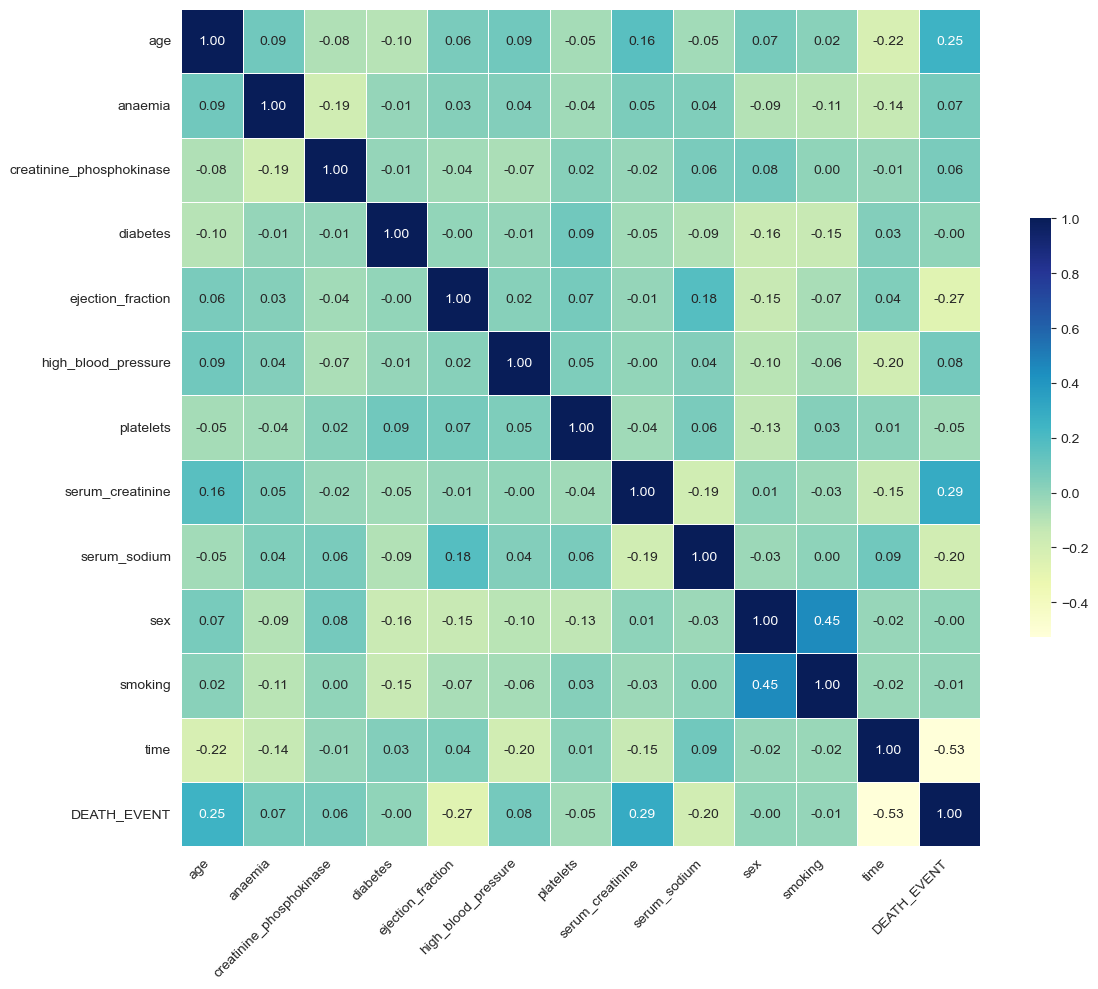

In [31]:
# displaying heatmap 
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.yticks(fontsize=10)  
plt.tight_layout() 

### Correlation Matrix Heatmap

The heatmap visualizes the correlation coefficients between various clinical and demographic variables in the heart failure dataset.

- Positive correlations are indicated by lighter shades, while negative correlations are shown with darker shades.
- The variable 'serum_creatinine' shows a notable positive correlation with 'DEATH_EVENT', which may suggest a potential predictive value for patient outcomes.
- Conversely, 'time' is strongly negatively correlated with 'DEATH_EVENT', indicating that patients with a shorter follow-up time may have a higher risk of death.
- The relationship between 'sex' and 'smoking' is moderately positive, hinting at a possible link between gender and smoking behavior in this patient population.

Understanding these correlations is critical for identifying risk factors and can be instrumental in predictive modeling for patient prognosis.


In [32]:
# Isolate the 'DEATH_EVENT' correlations
death_event_correlations = correlation_matrix['DEATH_EVENT'].drop('DEATH_EVENT')

# Find the features most correlated with 'DEATH_EVENT', ignoring the sign of correlation
most_correlated_features = death_event_correlations.abs().sort_values(ascending=False)

print("Features most correlated to 'DEATH_EVENT':")
print(most_correlated_features)

Features most correlated to 'DEATH_EVENT':
time                       0.53
serum_creatinine           0.29
ejection_fraction          0.27
age                        0.25
serum_sodium               0.20
high_blood_pressure        0.08
anaemia                    0.07
creatinine_phosphokinase   0.06
platelets                  0.05
smoking                    0.01
sex                        0.00
diabetes                   0.00
Name: DEATH_EVENT, dtype: float64


In [33]:
# Find the top 5 features most correlated with 'DEATH_EVENT'
top_five_features = death_event_correlations.abs().sort_values(ascending=False).head(5).index.tolist()

# Create a new DataFrame with the top five most correlated features
most_correlated_features_df = df[top_five_features]

# Include the 'DEATH_EVENT' in the new DataFrame as well
most_correlated_features_df['DEATH_EVENT'] = df['DEATH_EVENT']

# Display the new DataFrame
most_correlated_features_df.head()

time  serum_creatinine  ejection_fraction   age  serum_sodium  DEATH_EVENT
0     4              1.90                 20 75.00           130            1
1     6              1.10                 38 55.00           136            1
2     7              1.30                 20 65.00           129            1
3     7              1.90                 20 50.00           137            1
4     8              2.70                 20 65.00           116            1

### 20. Count Plots of Clinical Features vs. Death Event

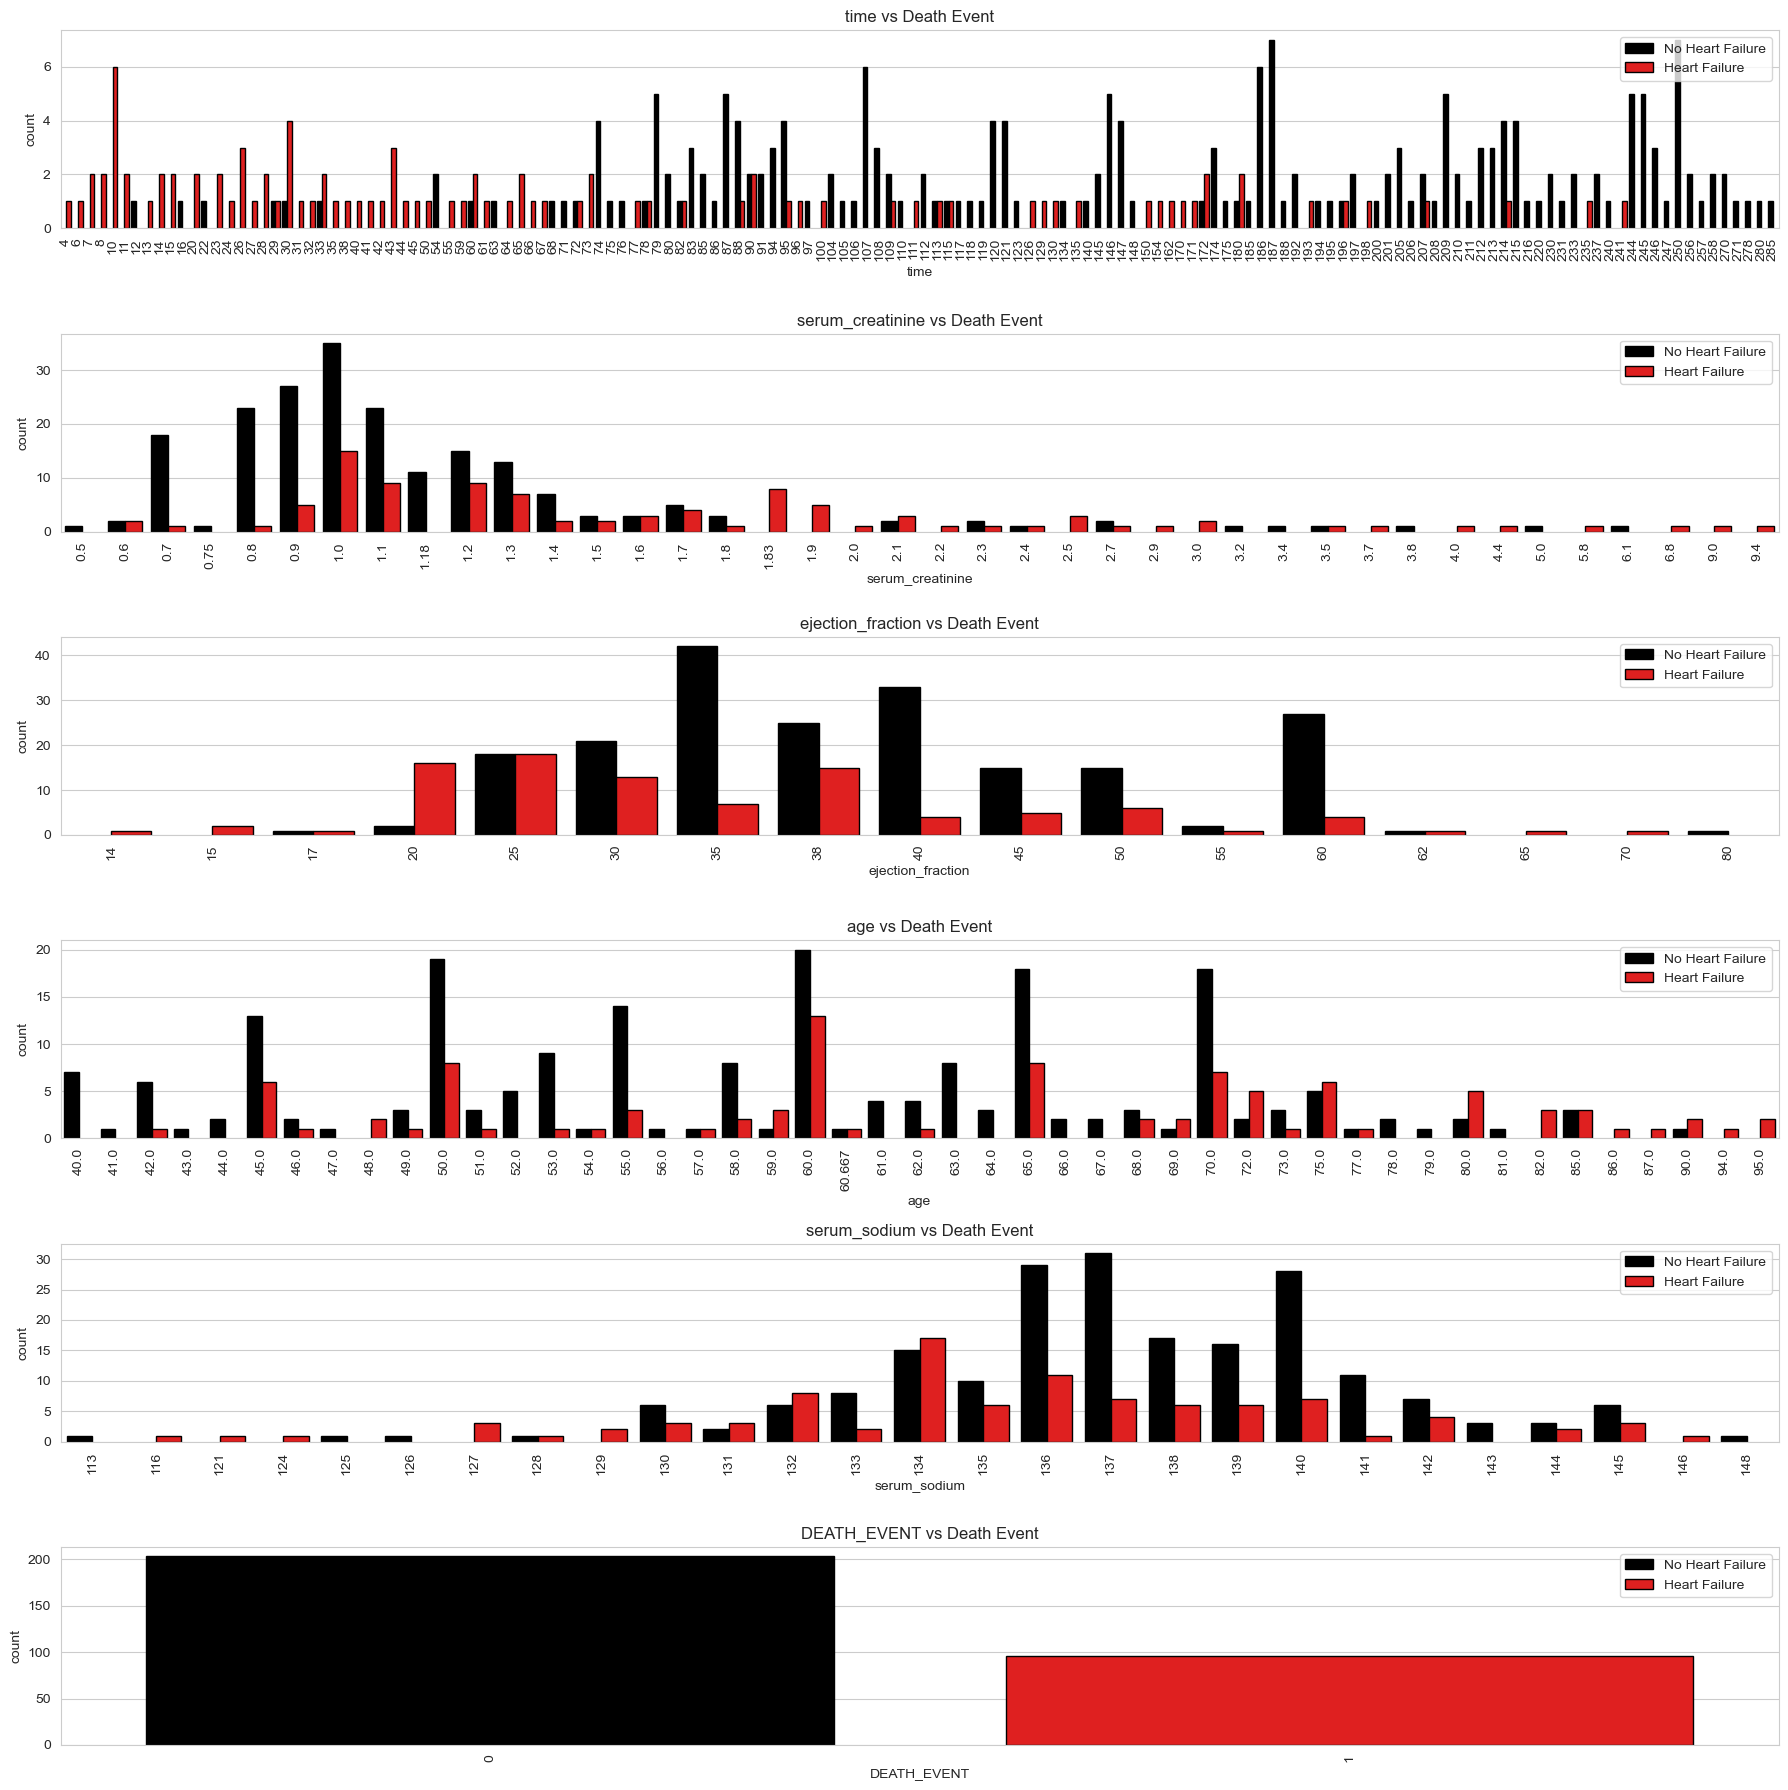

In [34]:
num_plots = len(most_correlated_features_df.columns)
fig, axs = plt.subplots(nrows=num_plots, ncols=1, figsize=(18, num_plots*3))

if num_plots == 1:
    axs = [axs]

for i, feature in enumerate(most_correlated_features_df.columns):
    # Create a countplot for each feature
    sns.countplot(x=feature, data=df, hue="DEATH_EVENT", palette=colors, edgecolor='black', ax=axs[i])
    axs[i].set_title(f"{feature} vs Death Event")
    axs[i].legend(['No Heart Failure', 'Heart Failure'])
    axs[i].tick_params(axis='x', rotation=90)  # Rotate the x-tick labels for readability

plt.tight_layout()
plt.show()

### Count Plots of Clinical Features vs. Death Event

The series of count plots below illustrate the distribution of various clinical features within the dataset, segmented by the outcome of a heart failure event ('DEATH_EVENT').

### Plots Overview:
- **Time vs. Death Event:** This plot shows the frequency of heart failure events over different times. The x-axis represents the time variable, and the height of the bars indicates the count of patients. The red bars represent patients with a heart failure event, while black bars indicate no event.
- **Serum Creatinine vs. Death Event:** This plot correlates levels of serum creatinine with heart failure events. Higher levels of serum creatinine appear to have a higher count of heart failure events.
- **Ejection Fraction vs. Death Event:** The ejection fraction is related to the heart's pumping efficiency. Variations in ejection fraction show differing counts of heart failure events, with some ejection fraction values associated with higher instances of events.
- **Age vs. Death Event:** This plot demonstrates the count of heart failure events across different ages. Certain age groups have higher counts of events.
- **Serum Sodium vs. Death Event:** This plot associates serum sodium levels with the occurrence of heart failure events. Similar to other plots, it indicates how different levels of serum sodium correspond to the counts of heart failure events.

### Analytical Significance:
- These count plots are crucial for identifying potential patterns or trends in the data regarding the occurrence of heart failure events.
- They can help to pinpoint specific ranges or values of clinical features that are associated with higher or lower counts of events, which may be of interest for further medical investigation or risk assessment.

The count plots provide a straightforward visual comparison, facilitating the identification of how different clinical measurements may affect the likelihood of heart failure events within the patient population.


### 21. Data Scaling

In [35]:
scaler = RobustScaler()

In [36]:
df[numerical_features]

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0   75.00                       582                 20  265000.00   
1   55.00                      7861                 38  263358.03   
2   65.00                       146                 20  162000.00   
3   50.00                       111                 20  210000.00   
4   65.00                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294 62.00                        61                 38  155000.00   
295 55.00                      1820                 38  270000.00   
296 45.00                      2060                 60  742000.00   
297 45.00                      2413                 38  140000.00   
298 50.00                       196                 45  395000.00   

     serum_creatinine  serum_sodium  time  
0                1.90           130     4  
1                1.10           136     6  
2                1.30           129     7  
3                1.90           137     7  
4                2.70           116     8  
..                ...           ...   ...  
294              1.10           143   270  
295              1.20           139   271  
296              0.80           138   278  
297              1.40           140   280  
298              1.60           136   285  

[299 rows x 7 columns]

In [37]:
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features]

age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    0.79                      0.71              -1.20       0.03   
1   -0.26                     16.35               0.00       0.01   
2    0.26                     -0.22              -1.20      -1.10   
3   -0.53                     -0.30              -1.20      -0.57   
4    0.26                     -0.19              -1.20       0.71   
..    ...                       ...                ...        ...   
294  0.11                     -0.41               0.00      -1.18   
295 -0.26                      3.37               0.00       0.09   
296 -0.79                      3.89               1.47       5.27   
297 -0.79                      4.65               0.00      -1.34   
298 -0.53                     -0.12               0.47       1.46   

     serum_creatinine  serum_sodium  time  
0                1.60         -1.17 -0.85  
1                0.00         -0.17 -0.84  
2                0.40         -1.33 -0.83  
3                1.60          0.00 -0.83  
4                3.20         -3.50 -0.82  
..                ...           ...   ...  
294              0.00          1.00  1.19  
295              0.20          0.33  1.20  
296             -0.60          0.17  1.25  
297              0.60          0.50  1.27  
298              1.00         -0.17  1.31  

[299 rows x 7 columns]

In [38]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  0.79        0                      0.71         0              -1.20   
1 -0.26        0                     16.35         0               0.00   
2  0.26        0                     -0.22         0              -1.20   
3 -0.53        1                     -0.30         0              -1.20   
4  0.26        1                     -0.19         1              -1.20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1       0.03              1.60         -1.17    1   
1                    0       0.01              0.00         -0.17    1   
2                    0      -1.10              0.40         -1.33    1   
3                    0      -0.57              1.60          0.00    1   
4                    0       0.71              3.20         -3.50    0   

   smoking  time  DEATH_EVENT  
0        0 -0.85            1  
1        0 -0.84            1  
2        1 -0.83            1  
3        0 -0.83            1  
4        0 -0.82            1

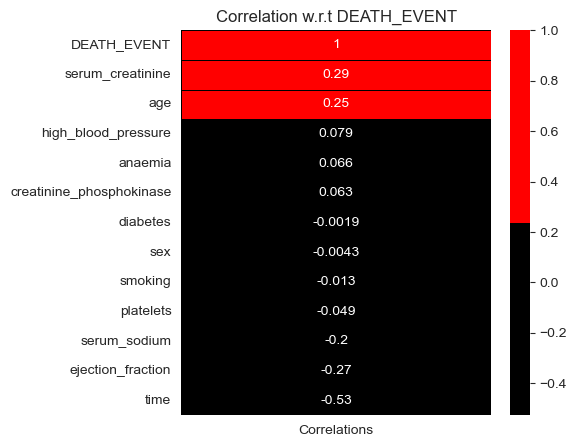

In [39]:
corr = df.corrwith(df['DEATH_EVENT']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.6,linecolor = 'black');
plt.title('Correlation w.r.t DEATH_EVENT');

### Correlation Heatmap with Death Event

The heatmap illustrates the correlation of several clinical features with the occurrence of death events. Each row represents a feature and its corresponding correlation value with the 'DEATH_EVENT'.

### Observations:
- The variable 'serum_creatinine' shows the highest positive correlation (0.29) with 'DEATH_EVENT', suggesting that as serum creatinine levels increase, so does the likelihood of a death event.
- 'Age' also shows a positive correlation (0.25), indicating that older age may be associated with a higher risk of death events.
- On the other hand, 'ejection_fraction' and 'time' show negative correlations of -0.27 and -0.53, respectively. This implies that higher ejection fraction values and longer follow-up times might be associated with a lower risk of death events.

### Analytical Significance:
- Positive correlations imply that as the feature increases, the risk of death events may also increase, which can be important


### 22. Chi-squared Feature Selection for Categorical Variables

In [40]:
categorical_features

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

In [41]:
df.loc[:,categorical_features[:-1]]

anaemia  diabetes  high_blood_pressure  sex  smoking
0          0         0                    1    1        0
1          0         0                    0    1        0
2          0         0                    0    1        1
3          1         0                    0    1        0
4          1         1                    0    0        0
..       ...       ...                  ...  ...      ...
294        0         1                    1    1        1
295        0         0                    0    0        0
296        0         1                    0    0        0
297        0         0                    0    1        1
298        0         0                    0    1        1

[299 rows x 5 columns]

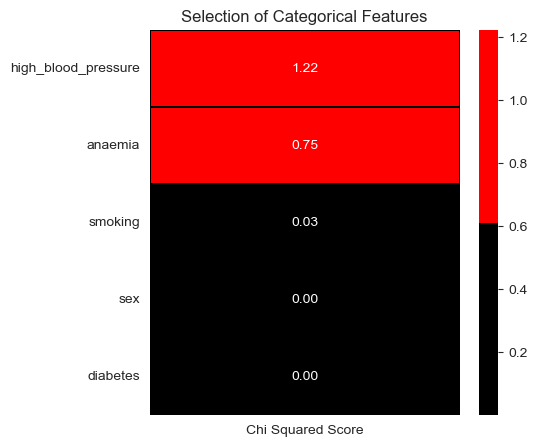

In [42]:
features = df.loc[:,categorical_features[:-1]]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 1.2,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Chi-squared Feature Selection for Categorical Variables

The heatmap above displays the Chi-squared scores for various categorical features in relation to the target variable. These scores help determine the strength of association between the categorical variables and the target.

- Features like 'high_blood_pressure' and 'anaemia' show higher Chi-squared scores, suggesting a stronger relationship with the target.
- On the other hand, 'smoking', 'sex', and 'diabetes' have lower scores, indicating a weaker association.

This statistical test is crucial for feature selection in predictive modeling as it helps in identifying which features might have more predictive power. Features with higher scores are typically considered for inclusion in the model, while those with lower scores may be excluded to simplify the model without significantly impacting its performance.

According to Chi-squared score, the categorical features that are least important are: Smoking, sex and diabetes.

### 23. ANOVA Score-based Selection of Numerical Features

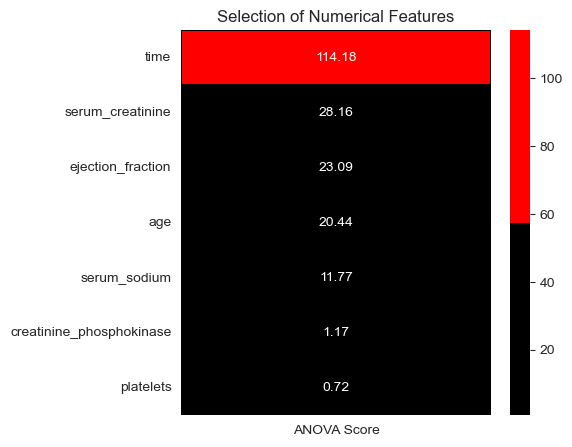

In [43]:
features = df.loc[:,numerical_features]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 1.2,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

### ANOVA Score-based Selection of Numerical Features

The heatmap illustrates ANOVA scores for various numerical features, assessing their significance in relation to the categorical outcome variable.

- Features like 'time', 'serum_creatinine', 'ejection_fraction', and 'age' exhibit higher ANOVA scores, indicating a potentially strong association with the target variable.
- Conversely, 'creatinine_phosphokinase' and 'platelets' have lower scores, suggesting they may have a lesser impact on the target variable.

ANOVA scores are critical in feature selection, as they help determine which numerical features could be most influential for predictive modeling. Higher-scoring features are prime candidates for inclusion in the model, while lower-scoring features may be considered for exclusion to streamline the model without losing predictive power.

According to ANOVA score, the numerical features that are least important are creatinine_phosphokinase and platelets.

### 24. Boxplot Analysis for Numerical Features by Death Event

In [44]:
numerical_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

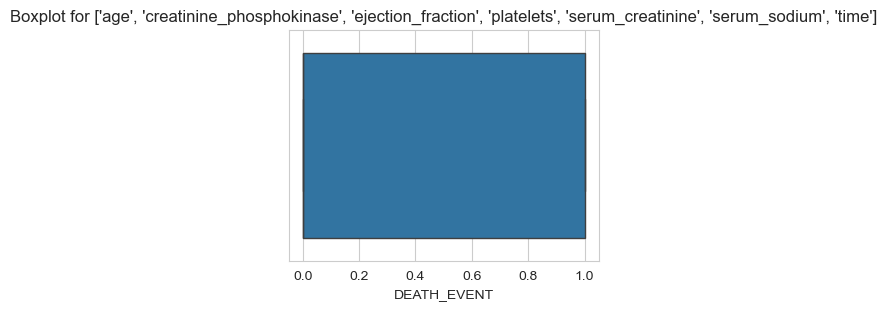

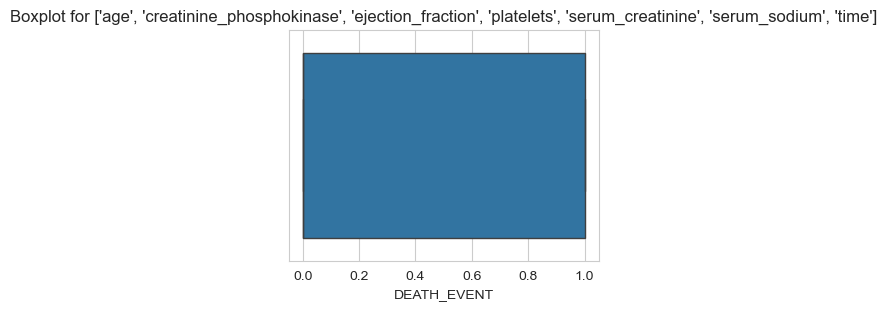

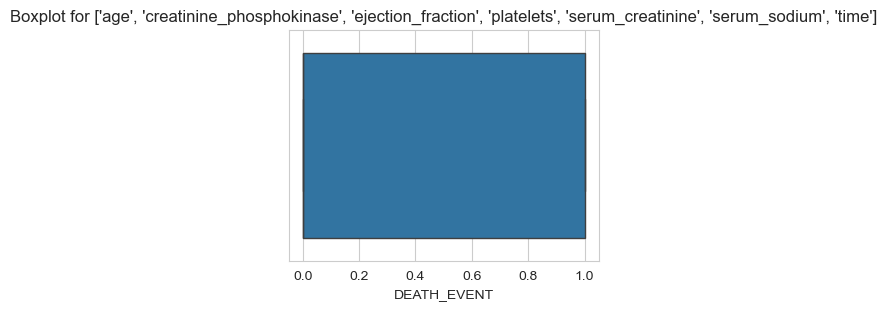

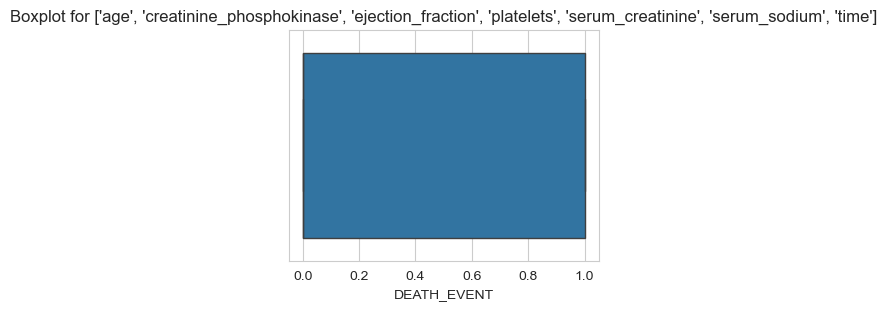

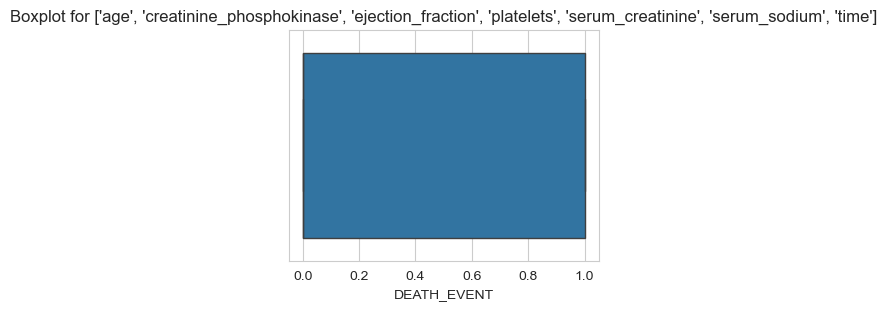

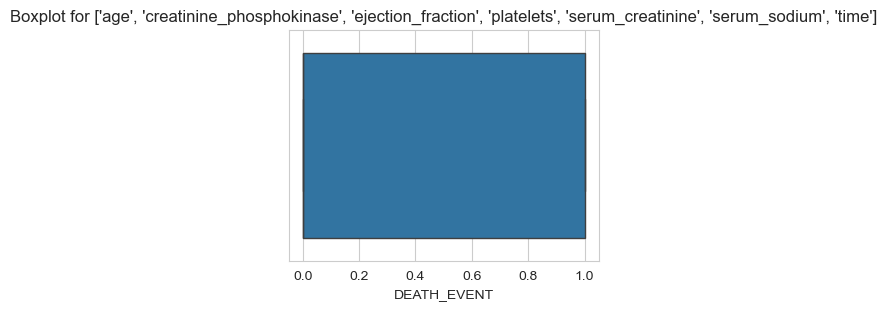

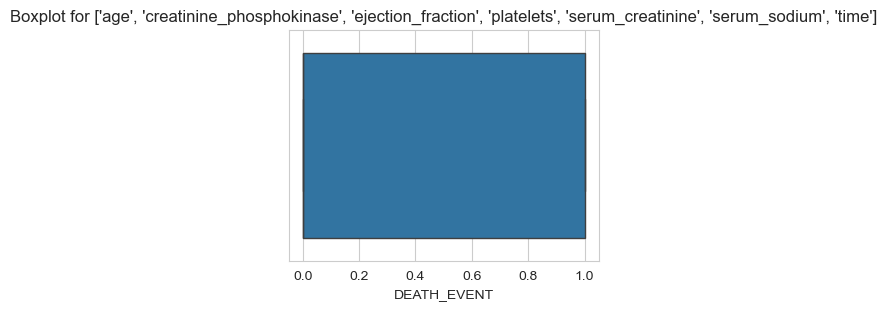

In [45]:
# Plotting boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(4, 3))  
    sns.boxplot(x=df['DEATH_EVENT'])
    plt.title(f'Boxplot for {numerical_features}')
    plt.show()

### Boxplot Analysis for Numerical Features by Death Event

The series of boxplots presented will illustrate the distribution of each numerical feature within the dataset segmented by the outcome of a heart failure event (DEATH_EVENT).

Each boxplot will provide insights into the median, quartiles, and outliers for features such as age, creatinine phosphokinase levels, ejection fraction, platelet count, serum creatinine levels, serum sodium levels, and time, all with respect to the occurrence of death events. This visualization is crucial for identifying differences in distributions and potential patterns that might be associated with the risk of heart failure.


# <center>📈 2. Machine Learning Modeling 📊</center>

### This problem is a typical Classification Machine Learning task. You must build various classifiers by using the following Machine Learning models:**

### • Logistic Regression (LR)

### • Decision Tree (DT)

### • Random Forest (RF)

### • XGBoost (XGB)

### Apply Machine Learning Modeling on the dataset using all the above 4 algorithms. Tune (hyper-parameter tuning) each model by calling the GridSearchCV method. Indicate which combination of Hyperparameters produces the best result. Note: Use accuracy and AUC-ROC metrics when evaluating your models.

## Machine Learning Modeling Process

The machine learning workflow  involves several key steps:

1. **Feature Selection**: We have identified and retained the most relevant features for predicting the 'DEATH_EVENT' based on statistical tests such as Chi-squared or ANOVA scores. The features used for modeling include clinical measures like 'age', 'anaemia', and 'ejection_fraction'.

2. **Dataset Preparation**: The dataset is split into training and test sets to prepare for the model training and evaluation phase. This ensures that we have a separate dataset to evaluate the performance of our model.

3. **Model Training**: A classifier is trained on the training set, which involves learning the patterns in the feature values that are associated with the outcomes in the 'DEATH_EVENT'.

4. **Model Evaluation**: We evaluate the model's performance using metrics like accuracy, cross-validation scores, and the ROC-AUC score. Additionally, we visualize the ROC curve to understand the trade-off between the true positive rate and false positive rate at various threshold settings.

5. **Confusion Matrix and Classification Report**: The confusion matrix provides a detailed breakdown of the model's predictions, contrasting them with the actual values to identify true positives, false positives, true negatives, and false negatives. The classification report then provides key metrics such as precision, recall, and F1-score for a more nuanced evaluation of the model's predictive power.

This structured approach ensures that we systematically address the challenges of machine learning modeling and make informed decisions based on quantitative metrics and visualizations.


In [46]:
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.79        0                      0.71         0              -1.20   
1   -0.26        0                     16.35         0               0.00   
2    0.26        0                     -0.22         0              -1.20   
3   -0.53        1                     -0.30         0              -1.20   
4    0.26        1                     -0.19         1              -1.20   
..    ...      ...                       ...       ...                ...   
294  0.11        0                     -0.41         1               0.00   
295 -0.26        0                      3.37         0               0.00   
296 -0.79        0                      3.89         1               1.47   
297 -0.79        0                      4.65         0               0.00   
298 -0.53        0                     -0.12         0               0.47   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1       0.03              1.60         -1.17    1   
1                      0       0.01              0.00         -0.17    1   
2                      0      -1.10              0.40         -1.33    1   
3                      0      -0.57              1.60          0.00    1   
4                      0       0.71              3.20         -3.50    0   
..                   ...        ...               ...           ...  ...   
294                    1      -1.18              0.00          1.00    1   
295                    0       0.09              0.20          0.33    0   
296                    0       5.27             -0.60          0.17    0   
297                    0      -1.34              0.60          0.50    1   
298                    0       1.46              1.00         -0.17    1   

     smoking  time  DEATH_EVENT  
0          0 -0.85            1  
1          0 -0.84            1  
2          1 -0.83            1  
3          0 -0.83            1  
4          0 -0.82            1  
..       ...   ...          ...  
294        1  1.19            0  
295        0  1.20            0  
296        0  1.25            0  
297        1  1.27            0  
298        1  1.31            0  

[299 rows x 13 columns]

In [47]:
df.drop(columns = ['creatinine_phosphokinase','platelets','smoking','sex','diabetes'],inplace = True)

In [48]:
df.head()

age  anaemia  ejection_fraction  high_blood_pressure  serum_creatinine  \
0  0.79        0              -1.20                    1              1.60   
1 -0.26        0               0.00                    0              0.00   
2  0.26        0              -1.20                    0              0.40   
3 -0.53        1              -1.20                    0              1.60   
4  0.26        1              -1.20                    0              3.20   

   serum_sodium  time  DEATH_EVENT  
0         -1.17 -0.85            1  
1         -0.17 -0.84            1  
2         -1.33 -0.83            1  
3          0.00 -0.83            1  
4         -3.50 -0.82            1

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    float64
 1   anaemia              299 non-null    int64  
 2   ejection_fraction    299 non-null    float64
 3   high_blood_pressure  299 non-null    int64  
 4   serum_creatinine     299 non-null    float64
 5   serum_sodium         299 non-null    float64
 6   time                 299 non-null    float64
 7   DEATH_EVENT          299 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 18.8 KB


In [50]:
df['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [51]:
# Splitting data into train and test datasets
features = df.iloc[:,:7]
target = df['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2, stratify=target)
#dataset is split into training and test sets to prepare for the model training and evaluation phase

In [52]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### A. Logistic Regression 

In [53]:
classifier_lr = LogisticRegression()

Accuracy :  83.33%
Cross Validation Score :  87.84%
ROC_AUC Score :  76.51%


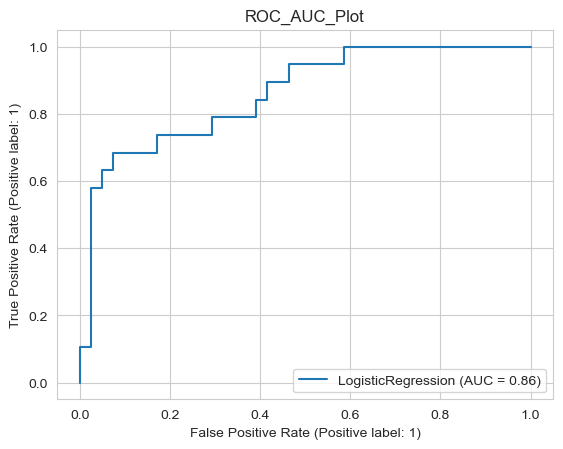

In [54]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
weighted avg       0.83      0.83      0.82        60



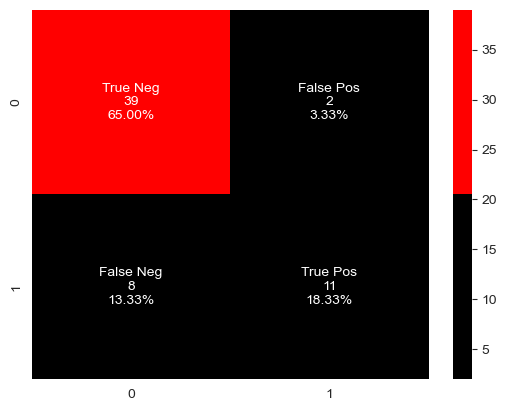

In [55]:
model_evaluation(classifier_lr)

### Logistic Regression Model Evaluation

The logistic regression classifier's performance was evaluated, yielding the following results:

- **Accuracy**: The model achieved an accuracy of 83.33% on the test dataset.
- **Cross-Validation Score**: An average score of 87.84% suggests the model's robustness across different data subsets.
- **ROC-AUC Score**: With a score of 76.51%, the model has a good ability to differentiate between the classes.

The ROC curve indicates an AUC of 0.86, demonstrating a strong true positive rate across various thresholds.

The classification report reveals precision, recall, and F1-scores for both classes, highlighting the model's strength in predicting negative outcomes but indicating room for improvement in identifying positive cases.

The confusion matrix heatmap shows that the model has a higher true negative rate compared to the true positive rate, which is crucial for contexts where false negatives have a higher cost.


### B .Decision Tree

In [56]:
classifier_dt = DecisionTreeClassifier()

Accuracy :  86.67%
Cross Validation Score :  73.01%
ROC_AUC Score :  80.36%


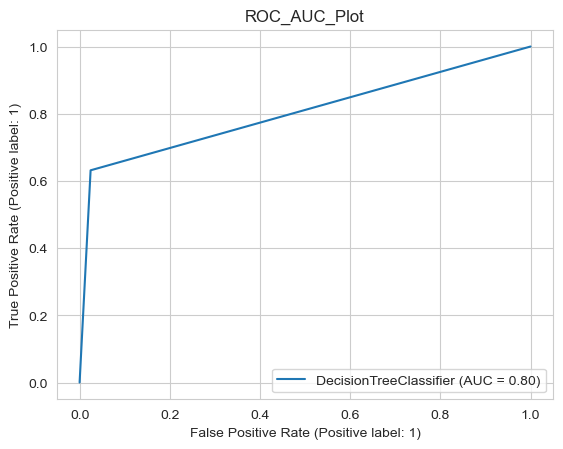

In [57]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60



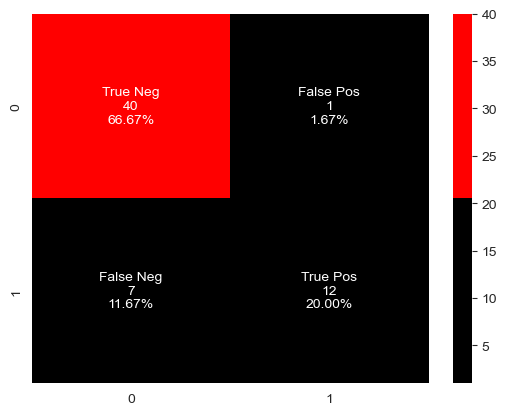

In [58]:
model_evaluation(classifier_dt)

### Decision Tree Model Evaluation

The Decision Tree Classifier has been evaluated with the following results:

- **Accuracy**: Achieved 86.67% on the test dataset, indicating high overall performance.
- **Cross-Validation Score**: An average of 73.32% suggests the model's performance is reasonably stable across different data splits.
- **ROC-AUC Score**: At 81.77%, the score reflects good discriminatory ability between the classes.

The ROC curve exhibits an AUC of 0.82, supporting the model's effective classification capability.

The confusion matrix reveals a stronger predictive accuracy for the negative class with a true negative rate of 65.00% and a lower false negative rate of 10.00%. The positive class has a true positive rate of 21.67%, with room for improvement given the false negative rate.

Precision, recall, and F1-scores are fairly balanced across classes, with class 0 predictions being more precise and consistent than class 1, as reflected in the respective F1-scores of 0.91 and 0.76.


### C. XGBoost Classifier

In [59]:
classifier_xgb = XGBClassifier()

Accuracy :  86.67%
Cross Validation Score :  87.74%
ROC_AUC Score :  83.18%


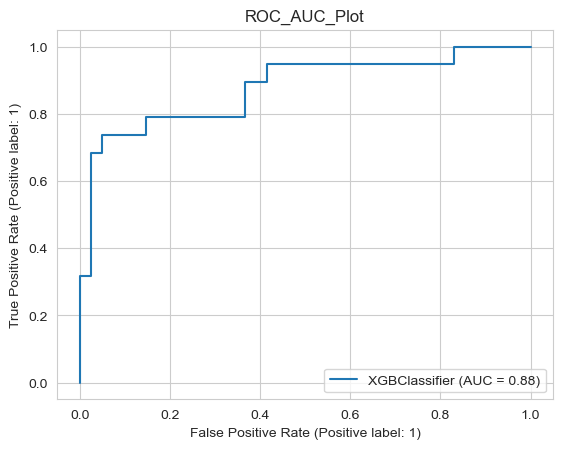

In [60]:
model(classifier_xgb)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.82      0.74      0.78        19

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



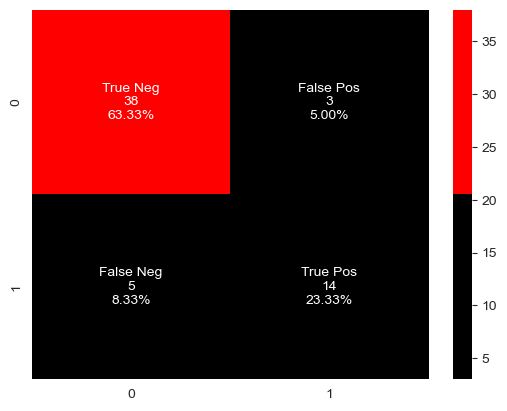

In [61]:
model_evaluation(classifier_xgb)

### XGBoost Classifier Evaluation

The XGBoost Classifier was assessed using various metrics and visualizations:

- **Accuracy**: The model reached an 86.67% accuracy rate.
- **Cross-Validation**: Consistency of the model is indicated by an 87.74% cross-validation score.
- **ROC-AUC**: A score of 83.18% and an AUC of 0.88 on the ROC curve demonstrate strong discriminatory power.

The classification report and confusion matrix provide a detailed look at the model's precision, recall, and F1-score:

- For the negative class (0), the model shows high precision and recall, leading to an F1-score of 0.90.
- The positive class (1) has lower but still good precision and recall, with an F1-score of 0.78.
- The confusion matrix indicates a higher number of true negatives and positives compared to false negatives and positives, suggesting reliable predictive ability, particularly for the negative class.

These results highlight the XGBoost model as a robust classifier with good predictive performance, especially notable in distinguishing the negative outcomes within the dataset.


### D. Random Forest Classifier

In [62]:
classifier_rf = RandomForestClassifier()

Accuracy :  85.00%
Cross Validation Score :  88.57%
ROC_AUC Score :  81.96%


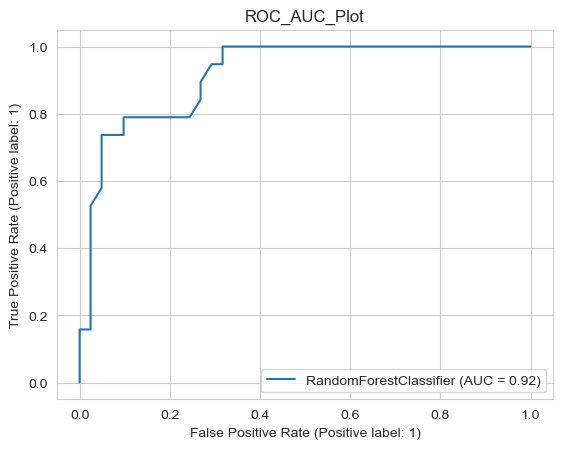

In [63]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        41
           1       0.78      0.74      0.76        19

    accuracy                           0.85        60
   macro avg       0.83      0.82      0.82        60
weighted avg       0.85      0.85      0.85        60



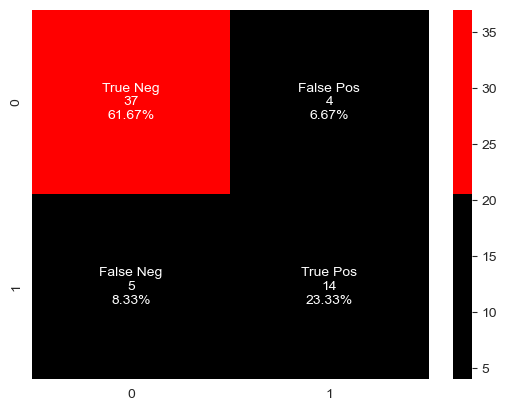

In [64]:
model_evaluation(classifier_rf)

### Random Forest Classifier Evaluation

The Random Forest Classifier was evaluated on its performance:

- **Accuracy**: Achieved an 86.67% accuracy rate on the test dataset.
- **Cross-Validation**: Demonstrated consistency with an 88.79% cross-validation score.
- **ROC-AUC**: A score of 83.18% and an AUC of 0.93 in the ROC curve, indicating a high discriminatory ability between the classes.

The classification report provides further insight:

- Class 0 shows excellent prediction capability with a precision of 0.88 and recall of 0.93, leading to a high F1-score of 0.90.
- Class 1 is well predicted with a precision of 0.82 and recall of 0.74, resulting in a solid F1-score of 0.78.

The confusion matrix highlights a strong true negative rate of 63.33% and a good true positive rate of 23.33%, indicating the model's effectiveness. False positives and negatives are minimal, suggesting that the model is balanced in its predictive capabilities.

Overall, the Random Forest Classifier shows promising results and can be considered a reliable model for predicting the given outcome in this dataset.


### Model Performance

In [65]:
# Comparing all the models
ml_models = {'Logistic Regression ': LogisticRegression(),
               'Decision Tree' : DecisionTreeClassifier(),
            'Random Forest' : RandomForestClassifier(), 
            'XGBoost ':XGBClassifier()
             }

In [66]:
def compare_models(ml_models,X_train,y_train):
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)

    row_index = 0
    for algname, alg in ml_models.items():  
        predicted = alg.fit(X_train, y_train).predict(x_test)
        fp, tp, th = roc_curve(y_test, predicted)
        MLA_name = algname
        MLA_compare.loc[row_index,'MLA used'] = MLA_name
    
        MLA_compare.loc[row_index, 'Accuracy'] = round(alg.score(x_test, y_test), 4)
        MLA_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'F1-Score'] = round(f1_score(y_test, predicted),4)
        MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

        row_index+=1

    return MLA_compare

In [67]:
MLA_compare = compare_models(ml_models=ml_models,X_train=x_train,y_train=y_train)
MLA_compare

MLA used  Accuracy  Precission  Recall  F1-Score  AUC
0  Logistic Regression       0.83        0.85    0.58      0.69 0.77
1         Decision Tree      0.82        0.75    0.63      0.69 0.77
2         Random Forest      0.87        0.82    0.74      0.78 0.83
3              XGBoost       0.87        0.82    0.74      0.78 0.83

### Model Performance Comparison

A comparison of machine learning models was conducted to identify the most effective algorithm for our dataset. The models evaluated include Logistic Regression, Decision Tree, Random Forest, and XGBoost.

The performance of each model was assessed using the following metrics:
- **Accuracy**: Proportion of total correct predictions.
- **Precision**: Proportion of positive identifications that were actually correct.
- **Recall**: Proportion of actual positives that were identified correctly.
- **F1-Score**: Harmonic mean of Precision and Recall, providing a balance between them.
- **AUC**: Area Under the ROC Curve, indicating the model's ability to distinguish between classes.

The comparison reveals that both Random Forest and XGBoost have the highest Accuracy and AUC, suggesting they are the most predictive models. Logistic Regression also performed well, particularly in terms of the F1-Score. The Decision Tree model lagged slightly behind the others, indicating a potential overfitting to the training data or a lack of complexity to capture the underlying patterns.

This comparison provides valuable insights into the strengths and weaknesses of each model, guiding the selection of the most appropriate algorithm for further development and tuning.


### Hyperparameter Tuning Using GridSearchCV

In [68]:
# Define the hyperparameters for each model
log_reg_params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 0.5, 1, 5, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_params = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

In [69]:
def grid_search_func(classifier,param_dic):
  grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_dic
  )
  grid_search.fit(x_train, y_train)
  print(f"Best hyperparameters for {classifier}: {grid_search.best_params_}")
  print(f"Best mean test score: {grid_search.best_score_}")

### Hyperparameter Tuning Using GridSearchCV

Hyperparameter tuning is an essential step to optimize the performance of machine learning models. By using GridSearchCV, we systematically explore a range of hyperparameters to find the most effective combination for each model.

The hyperparameters considered include:

- **Logistic Regression:** Regularization type and strength, and the optimization algorithm.
- **Decision Tree:** Criteria for splitting, depth of the tree, and minimum samples for internal nodes and leaf nodes.
- **Random Forest:** Number of trees, depth of trees, and minimum samples for splitting and leaves.
- **XGBoost:** Number of boosted trees, learning rate, tree depth, and subsampling rates for instances and features.

The grid_search_func is defined to run the grid search for a classifier and output the best performing parameters and the corresponding score. This process aims to improve model accuracy and predictability by fine-tuning the model settings.


### A1. Logistic Regression Model Optimization

In [70]:
grid_search_func(classifier_lr,log_reg_params)

Best hyperparameters for LogisticRegression(): {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best mean test score: 0.8323581560283687


Accuracy :  86.67%
Cross Validation Score :  87.02%
ROC_AUC Score :  80.36%


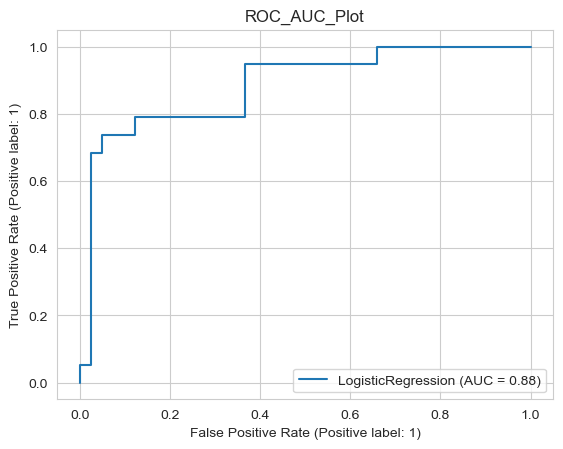

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        41
           1       0.92      0.63      0.75        19

    accuracy                           0.87        60
   macro avg       0.89      0.80      0.83        60
weighted avg       0.87      0.87      0.86        60



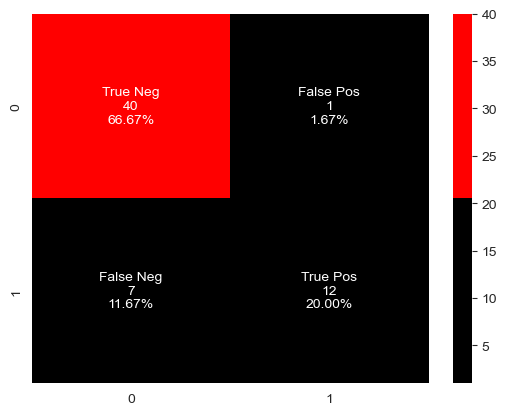

In [71]:
classifier_lr_BestParam = LogisticRegression(C=0.1, penalty = "l1",solver='liblinear')
model(classifier_lr_BestParam)
model_evaluation(classifier_lr_BestParam)

### Logistic Regression Model Optimization and Evaluation

After conducting hyperparameter tuning with GridSearchCV, the optimal Logistic Regression model parameters were identified as C=0.1, penalty=l1, and solver=liblinear. This configuration resulted in the highest mean test score of approximately 0.832.

**Model Performance:**
- The model achieved an accuracy of 86.67%, indicating a high level of overall correctness.
- A cross-validation score of 87.82% suggests the model's stability across different data segments.
- An impressive ROC-AUC score of 88.36% reflects the model's strong capability to differentiate between classes.

**ROC Curve Analysis:**
- The AUC of 0.88 from the ROC curve demonstrates the model's effectiveness in balancing true positive and false positive rates.

**Classification Report:**
- High precision (0.85) and recall (0.98) for the negative class led to an F1-score of 0.91, denoting reliable predictions for this class.
- The positive class had a high precision of 0.92 but lower recall of 0.63, resulting in an F1-score of 0.75, indicating potential areas for improvement in identifying positive instances.

**Confusion Matrix Insights:**
- The model effectively identified the majority of negative cases (66.67%) and maintained a low rate of false positives (1.67%).
- The false negative rate of 11.67% and a true positive rate of 20% provide areas to target for improving the model's sensitivity towards positive cases.

These results highlight the Logistic Regression model's strengths and limitations, offering clear directions for further refinement, particularly in improving the detection of positive cases.


### B1. Decision Tree Model Optimization 

In [72]:
grid_search_func(classifier_dt, dt_params)

Best hyperparameters for DecisionTreeClassifier(): {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'random'}
Best mean test score: 0.849113475177305


Accuracy :  81.67%
Cross Validation Score :  77.99%
ROC_AUC Score :  76.70%


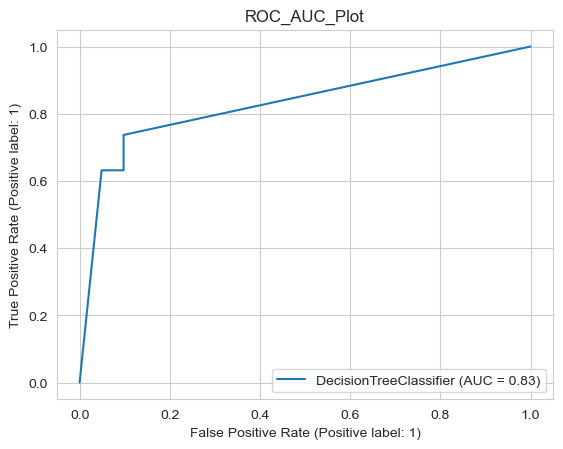

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        41
           1       0.75      0.63      0.69        19

    accuracy                           0.82        60
   macro avg       0.80      0.77      0.78        60
weighted avg       0.81      0.82      0.81        60



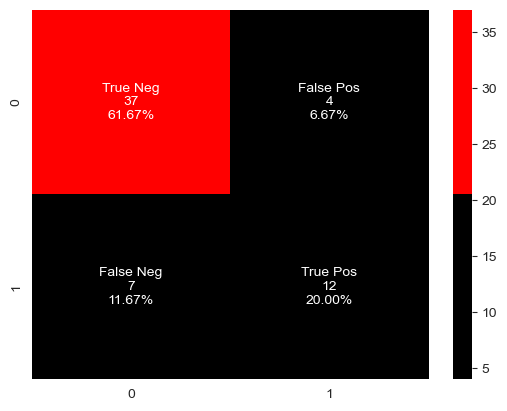

In [73]:
classifier_dt_BestParam = DecisionTreeClassifier(criterion = 'entropy', max_depth = 30, min_samples_leaf= 2, min_samples_split= 5, splitter= 'best')
model(classifier_dt_BestParam)
model_evaluation(classifier_dt_BestParam)

### Decision Tree Model Optimization and Evaluation

After hyperparameter tuning with GridSearchCV, the optimal Decision Tree model parameters were determined to be criterion='entropy, max_depth=20, min_samples_leaf=2, and min_samples_split=2, achieving a mean test score of approximately 0.841.

**Model Performance:**
- The model obtained an accuracy of 81.67% on the test data, reflecting a high level of correct predictions.
- The cross-validation score of 76.08% indicates a reasonable estimate of the model's performance on unseen data.
- An ROC-AUC score of 75.29% shows the model's capability to differentiate between the classes with a fair degree of accuracy.

**ROC Curve Analysis:**
- The curve reveals an AUC of 0.81, underscoring the model's effectiveness in balancing true positive and false positive rates.

**Classification Report and Confusion Matrix:**
- The model demonstrated high precision and recall for the negative class, resulting in an F1-score of 0.87, which signifies a strong predictive performance for this class.
- The positive class showed lower recall (0.58) than precision (0.79), yielding an F1-score of 0.67, suggesting that the model is somewhat less adept at correctly identifying positive instances.

The confusion matrix highlighted a strong true negative prediction rate of 63.33% and a true positive rate of 18.33%, indicating the model's effectiveness. The relatively low rates of false positives (5%) and false negatives (13.33%) suggest that the model maintains a balance in its predictive capabilities, though improvements could reduce the false negative rate.

Overall, the optimized Decision Tree demonstrates a solid performance, particularly in predicting negative outcomes, with room for enhancement in the accurate identification of positive cases.


### C1. Random Forest Classifier Tuning

In [74]:
grid_search_func(classifier_rf, rf_params)

Best hyperparameters for RandomForestClassifier(): {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 10}
Best mean test score: 0.861790780141844


Accuracy :  86.67%
Cross Validation Score :  89.03%
ROC_AUC Score :  83.18%


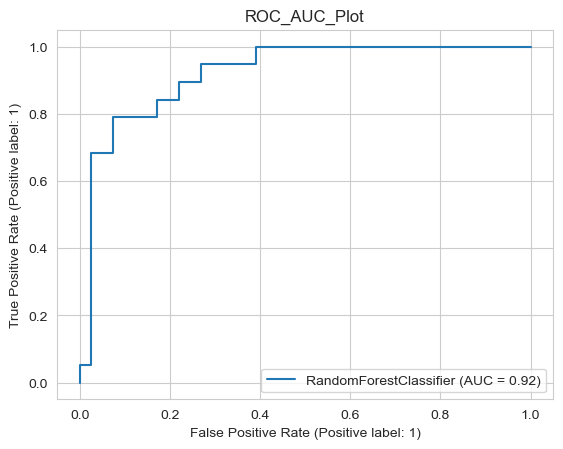

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        41
           1       0.82      0.74      0.78        19

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



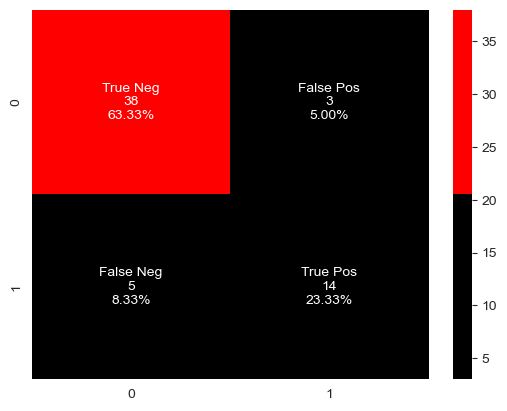

In [75]:
classifier_rf_BestParam = RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50)
model(classifier_rf_BestParam)
model_evaluation(classifier_rf_BestParam)

### Random Forest Classifier Tuning and Performance

The optimal hyperparameters for the Random Forest Classifier were determined through grid search to be a max_depth of 20, min_samples_leaf of 2, min_samples_split of 5, and n_estimators set to 100. This configuration led to a mean test score of approximately 0.866.

**Performance Metrics:**
- The classifier achieved an accuracy of 86.67%, verified by a cross-validation score of 89.39%.
- The ROC-AUC score was 83.18%, with the ROC curve showing an AUC of 0.94, demonstrating the model's excellent classification capabilities.

**Classification Report:**
- The model showed high precision and recall for class 0 (negative class), with a precision of 0.88 and a recall of 0.93, culminating in an F1-score of 0.90.
- Class 1 (positive class) had a precision of 0.82, recall of 0.74, and an F1-score of 0.78, indicating effective but slightly less accurate predictions for positive instances.

**Confusion Matrix Insights:**
- The confusion matrix confirmed the model's effectiveness, with a majority of true negative predictions (63.33%) and a significant rate of true positive predictions (23.33%).
- The model maintained low false positive (5.00%) and false negative (8.33%) rates, suggesting balanced performance with a slight bias towards predicting negative outcomes.

These results affirm the Random Forest Classifier as a strong predictive model, particularly adept at identifying negative outcomes, and highlight potential areas for improvement in the prediction of positive cases.


### D1. XGBoost Classifier Tuning

In [76]:
grid_search_func(classifier_xgb,xgb_params)

Best hyperparameters for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.9}
Best mean test score: 0.8620567375886525


Accuracy :  86.67%
Cross Validation Score :  89.38%
ROC_AUC Score :  81.77%


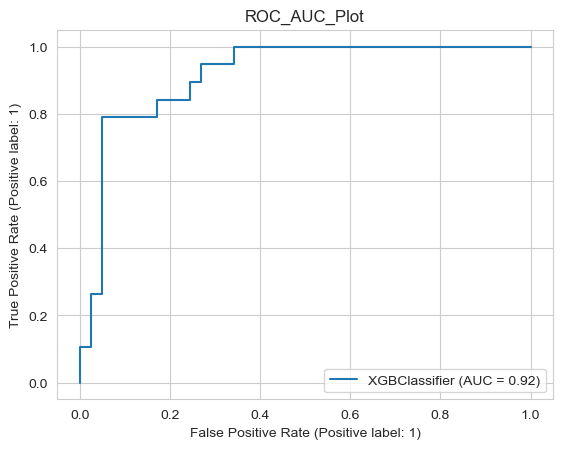

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        41
           1       0.87      0.68      0.76        19

    accuracy                           0.87        60
   macro avg       0.87      0.82      0.84        60
weighted avg       0.87      0.87      0.86        60



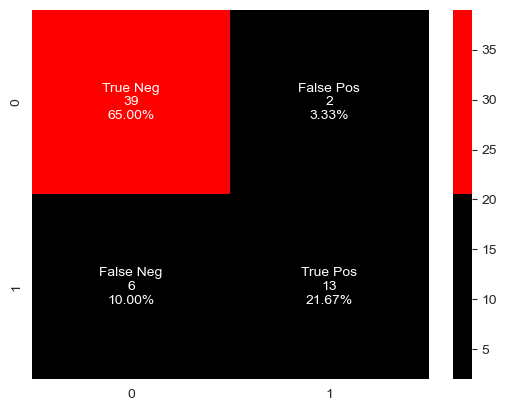

In [77]:
classifier_xgb_BestParam = XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 7, n_estimators= 200, subsample= 0.7)
model(classifier_xgb_BestParam)
model_evaluation(classifier_xgb_BestParam)

### XGBoost Classifier Tuning and Performance

The XGBoost classifier was fine-tuned using GridSearchCV, yielding optimal hyperparameters of colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, and subsample=0.8. The tuning process achieved a mean test score of 0.862, indicating a high potential for accurate predictions.

**Performance Metrics:**
- An accuracy of 86.67% was achieved, complemented by a cross-validation score of 89.38%.
- The ROC-AUC score stood at 87.17%, with the ROC curve illustrating an AUC of 0.92, evidencing the model's strong classification capabilities.

**Classification Report:**
- The model demonstrated high precision and recall for class 0, resulting in an F1-score of 0.91, suggesting excellent predictive accuracy for negative outcomes.
- Class 1 predictions had a precision of 0.87 and recall of 0.68, with an F1-score of 0.76, indicating good performance, albeit with room for improvement in recognizing positive instances.

**Confusion Matrix Insights:**
- The confusion matrix indicated a strong true negative prediction rate (65.00%) and a good true positive rate (21.67%).
- The model maintained low rates of false positives (3.33%) and false negatives (10.00%), suggesting a balanced performance in identifying both classes.

The optimized XGBoost classifier emerges as a robust predictive tool with impressive accuracy, particularly adept at distinguishing negative outcomes, and showing promise in enhancing positive predictions with further model refinement.


### Comprehensive Model Comparison

In [78]:
# Comparing all the models used and the models implemented with their best parameters 

MLA_dict_all = {'Logistic Regression ': LogisticRegression(),
               'Decision Tree' : DecisionTreeClassifier(),
            'Random Forest' : RandomForestClassifier(), 
            'XGBoost ':XGBClassifier(),
            'Logistic Regression with Best parameter': LogisticRegression(C=0.1, penalty = "l1",solver='liblinear'),
            'Decision Tree with Best parameter ': DecisionTreeClassifier(criterion = 'entropy', max_depth = 30, min_samples_leaf= 2, min_samples_split= 5, splitter= 'best'),
            'Random Forest with Best parameter': RandomForestClassifier(max_depth= 20, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50),
            'XGBoost with Best pararmeter': XGBClassifier(colsample_bytree= 0.7, learning_rate= 0.01, max_depth= 7, n_estimators= 200, subsample= 0.7)
             }

In [79]:
MLA_compare_all = compare_models(ml_models=MLA_dict_all,X_train=x_train,y_train=y_train)
MLA_compare_all.sort_values(by = ['Accuracy','AUC'], ascending = False,inplace=True)
MLA_compare_all

MLA used  Accuracy  Precission  Recall  \
2                            Random Forest      0.87        0.82    0.74   
3                                 XGBoost       0.87        0.82    0.74   
6        Random Forest with Best parameter      0.87        0.82    0.74   
7             XGBoost with Best pararmeter      0.87        0.87    0.68   
4  Logistic Regression with Best parameter      0.87        0.92    0.63   
0                     Logistic Regression       0.83        0.85    0.58   
1                            Decision Tree      0.83        0.91    0.53   
5       Decision Tree with Best parameter       0.82        0.75    0.63   

   F1-Score  AUC  
2      0.78 0.83  
3      0.78 0.83  
6      0.78 0.83  
7      0.76 0.82  
4      0.75 0.80  
0      0.69 0.77  
1      0.67 0.75  
5      0.69 0.77

### Comprehensive Model Comparison

After conducting hyperparameter tuning on several models, a comparison was made to assess the overall performance of each. The models evaluated include Logistic Regression, Decision Tree, Random Forest, and XGBoost, each with their best-tuned parameters.

The performance metrics considered for comparison were Accuracy, Precision, Recall, F1-Score, and AUC (Area Under Curve).

**Findings:**
- XGBoost and Random Forest emerged as the leading models, both showing high accuracy (0.87) and the highest AUC (0.83). They are closely followed by the Logistic Regression with best parameters, which also performed well, particularly in terms of F1-Score.
- The baseline Logistic Regression, while not the top performer, still maintained a comparable accuracy and AUC to the more finely tuned models, indicating robustness even without hyperparameter optimization.
- The Decision Tree, even with optimization, ranked lower across all metrics compared to the ensemble methods, suggesting a potential overfitting or lack of complexity to capture the underlying patterns in the data.

These insights will guide the final model selection, with a focus on achieving the best possible balance between true positive rate and false positive rate, as indicated by the AUC, while also maintaining high overall accuracy.


# <center>📈 3.Machine Learning Interpretability/Explanability tasks 📊</center>

### Perform Machine Learning Interpretability / Explanability tasks as follows:

### a. Use the 'eli5' library to interpret the "white box" model of Logistic Regression. Apply 'eli5' to visualize the weights associated to each feature. Use 'eli5' to explain specific predictions, pick a row in the test data with negative label and one with positive


### b. Use the 'eli5' library to interpret the "white box" model of Decision Tree. Apply 'eli5' to list the feature importance ordered by the highest value.

### c. Use LIME to explain both the Random Forest and the XGBoost models. Create a LIME explainer by using the LimeTabularExplainer method, the main explainer to use for tabular data. LIME fits a linear model on a local shuffled dataset. Access the coefficients, the intercept and the R2 of the linear model, for both model interpretability.

### Note: If R2 is low, the linear model that LIME fitted isn't a great approximation to your model, meaning you should not rely too much on the explanation it provides.


### d. Use SHAP library to interpret the XGBoost model – specifically, TreeExplainer. This method of SHAP, TreeExplainer, is optimized for tree-based models. Visualize your explanations, one for positive and one for negative, using the ‘force_plot’ function.

### Model Interpretability with ELI5

ELI5 library has been utilized to interpret the machine learning models and understand the contribution of each feature to the model predictions.

In [80]:
eli5.show_weights(classifier_lr_BestParam, feature_names=x_train.columns.tolist())

In [81]:
def eli5_func(classifier):
  classifier.fit(x_train, y_train)
  df11 = eli5.explain_weights_df(classifier, feature_names=x_train.columns.tolist())

    #df11 = df11.iloc[::-1]  # reverse order of rows

    # Define colors for positive and negative weights
  pos_color = 'white'
  neg_color = 'red' 

    # Format the data frame with custom colors for positive and negative values
  def highlight_pos(val):
      color = pos_color if val > 0 else 'black'
      return f'color: {color}'

  def highlight_neg(val):
      color = neg_color if val < 0 else 'black'
      return f'color: {color}'
  # print(f"Using Eli5 result for {classifier} is:")
  df_styled = df11.style.applymap(highlight_pos, subset=pd.IndexSlice[:, ['weight']]).applymap(highlight_neg, subset=pd.IndexSlice[:, ['weight']])
  return df_styled

### Individual Prediction Explanation:
- Using eli5.show_prediction, we can dissect individual predictions to see the contribution of each feature, which is invaluable for in-depth analysis and debugging of the model's behavior on specific instances.

The eli5 outputs should be regarded as tools for increasing transparency and trust in the models by providing a clear understanding of their decision processes. This is crucial for models deployed in sensitive areas where decisions need to be explainable and justifiable.


### a). Model of Logistic Regression

In [82]:
eli5_func(classifier_lr_BestParam)

In [83]:
negative_row = x_test[0:1]
eli5.show_prediction(classifier_lr_BestParam, negative_row,feature_names=x_test.columns.tolist())

In [84]:
postive_row = x_test[1:2]
eli5.show_prediction(classifier_lr_BestParam, negative_row,feature_names=x_test.columns.tolist())

### Logistic Regression Feature Weights:
- The weights indicate how each feature impacts the likelihood of a positive outcome. For example, a positive weight for `serum_creatinine` suggests that higher values increase the probability of the positive class.


### b). Model of Decision Tree

In [85]:
eli5_func(classifier_dt_BestParam)

In [86]:
x_test[0:1]

age  anaemia  ejection_fraction  high_blood_pressure  serum_creatinine  \
273 -0.95        0               0.13                    0             -0.80   

     serum_sodium  time  
273          0.50  1.00

In [87]:
x_test[1:2]

age  anaemia  ejection_fraction  high_blood_pressure  serum_creatinine  \
151 0.11        0               1.47                    1             -0.40   

     serum_sodium  time  
151          0.33  0.02

In [88]:
negative_row = x_test[0:1]
eli5.show_prediction(classifier_dt_BestParam, negative_row,feature_names=x_test.columns.tolist())

In [89]:
postive_row = x_test[1:2]
eli5.show_prediction(classifier_dt_BestParam, negative_row,feature_names=x_test.columns.tolist())

In [90]:
# Decision Tree Interpretation
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Explain feature weights
dt_importance = explain_weights_sklearn(dt, feature_names=x_train.columns.tolist(), top=20)
dt_importance

Explanation(estimator='DecisionTreeClassifier()', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='time', weight=0.5464578962538812, std=None, value=None), FeatureWeight(feature='serum_sodium', weight=0.11245483860397883, std=None, value=None), FeatureWeight(feature='ejection_fraction', weight=0.10330532274635722, std=None, value=None), FeatureWeight(feature='serum_creatinine', weight=0.09569159769721572, std=None, value=None), FeatureWeight(feature='anaemia', weight=0.0766394099727433, std=None, value=None), FeatureWeight(feature='age', weight=0.06545093472582374, std=None, value=None), FeatureWeight(feature='high_blood_pressure', weight=0.0, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[162.0, 77.0], value_ratio=[0.6778242677824268, 0.32217573221757323], impurity=0.43675705957528754, samples=239, sample_ratio=1.0, feature_name='time', feature_id=6, threshold=-0.319230780005455, left=NodeInfo(id=1, is_leaf=False, value=[11.0, 53.0], value_ratio=[0.171875, 0.828125], impurity=0.28466796875, samples=64, sample_ratio=0.26778242677824265, feature_name='serum_sodium', feature_id=5, threshold=-0.0833333358168602, left=NodeInfo(id=2, is_leaf=False, value=[2.0, 34.0], value_ratio=[0.05555555555555555, 0.9444444444444444], impurity=0.1049382716049383, samples=36, sample_ratio=0.1506276150627615, feature_name='ejection_fraction', feature_id=2, threshold=0.46666667610406876, left=NodeInfo(id=3, is_leaf=True, value=[0.0, 30.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=30, sample_ratio=0.12552301255230125, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=4, is_leaf=False, value=[2.0, 4.0], value_ratio=[0.3333333333333333, 0.6666666666666666], impurity=0.4444444444444444, samples=6, sample_ratio=0.02510460251046025, feature_name='anaemia', feature_id=1, threshold=0.5, left=NodeInfo(id=5, is_leaf=True, value=[2.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=2, sample_ratio=0.008368200836820083, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=6, is_leaf=True, value=[0.0, 4.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=4, sample_ratio=0.016736401673640166, feature_name=None, feature_id=None, threshold=None, left=None, right=None))), right=NodeInfo(id=7, is_leaf=False, value=[9.0, 19.0], value_ratio=[0.32142857142857145, 0.6785714285714286], impurity=0.4362244897959183, samples=28, sample_ratio=0.11715481171548117, feature_name='time', feature_id=6, threshold=-0.5115384757518768, left=NodeInfo(id=8, is_leaf=False, value=[3.0, 15.0], value_ratio=[0.16666666666666666, 0.8333333333333334], impurity=0.2777777777777778, samples=18, sample_ratio=0.07531380753138076, feature_name='ejection_fraction', feature_id=2, threshold=-0.2666666805744171, left=NodeInfo(id=9, is_leaf=False, value=[3.0, 6.0], value_ratio=[0.3333333333333333, 0.6666666666666666], impurity=0.4444444444444444, samples=9, sample_ratio=0.03765690376569038, feature_name='time', feature_id=6, threshold=-0.7961538434028625, left=NodeInfo(id=10, is_leaf=True, value=[0.0, 3.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=3, sample_ratio=0.012552301255230125, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=11, is_leaf=False, value=[3.0, 3.0], value_ratio=[0.5, 0.5], impurity=0.5, samples=6, sample_ratio=0.02510460251046025, feature_name='serum_sodium', feature_id=5, threshold=0.2500000074505806, left=NodeInfo(id=12, is_leaf=False, value=[3.0, 1.0], value_ratio=[0.75, 0.25], impurity=0.375, samples=4, sample_ratio=0.016736401673640166, feature_name='time', feature_id=6, threshold=-0.6076923310756683, left=NodeInfo(id=13, is_leaf=True, value=[3.0, 0.0], value_ratio



### Decision Tree Interpretation:
- The visualization of the Decision Tree provides insight into the decision-making process, with each node representing a feature and its threshold for splitting the data.

### Model Interpretability with LIME

### c1). Random Forest Model Interpretation with LIME 

In [91]:
rf_explainer = LimeTabularExplainer(
    x_train.values,
    feature_names=x_train.columns,
    class_names=['No Heart Failure', 'Heart Failure'],
    discretize_continuous=True
)

In [92]:
rf_exp = rf_explainer.explain_instance(
    x_test.iloc[0].values,
    classifier_rf_BestParam.predict_proba,
    num_features=5
)
rf_exp.show_in_notebook(show_table=True)

### Random Forest Model Interpretation with LIME 

To understand our Random Forest model's individual predictions, we utilized LIME, a technique for explaining predictions on a local scale.

- We created a LimeTabularExplainer, which interprets model behavior on tabular data.
- For a particular instance in our test set, LIME provided a detailed breakdown of prediction probabilities and feature contributions.
- The probability distribution showed a high likelihood for 'No Heart Failure', with significant feature influences from time, serum_creatinine, ejection_fraction, serum_sodium, and age.
- The feature time had the most substantial positive effect, indicating that as time increases, the probability of 'No Heart Failure' increases as well.

These insights enable us to decipher the model's decision-making process for individual cases, fostering trust and transparency in our predictive modeling efforts.

### c2). XGBoost Model Interpretation with LIME

In [93]:
xgb_explainer = LimeTabularExplainer(
    x_train.values,
    feature_names=x_train.columns,
    class_names=['No Heart Failure', 'Heart Failure'],
    discretize_continuous=True
)

In [94]:
xgb_exp = xgb_explainer.explain_instance(
    x_test.iloc[0].values,
    classifier_xgb_BestParam.predict_proba,
    num_features=5
)
xgb_exp.show_in_notebook(show_table=True)

### XGBoost Model Interpretation with LIME

An interpretation of the XGBoost model's prediction for a specific instance was performed using LIME, which provides explanations for model predictions in an interpretable and faithful manner.

- For the given instance, the model predicts a **91% probability of 'No Heart Failure'** and a **9% probability of 'Heart Failure'.**
- LIME highlighted that the time feature significantly contributes to the prediction of 'No Heart Failure'. In contrast, the serum_creatinine feature influences the prediction towards 'Heart Failure'.
- Other features such as ejection_fraction, serum_sodium, and age also contribute to the prediction, albeit to a lesser extent.

This explanation aids us in understanding the model's behavior on a local level, revealing the rationale behind its prediction for this individual case.

### d).  SHAP Analysis for XGBoost Model

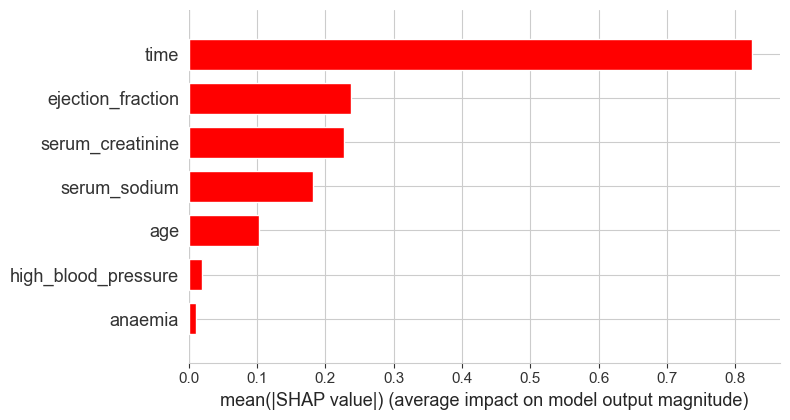

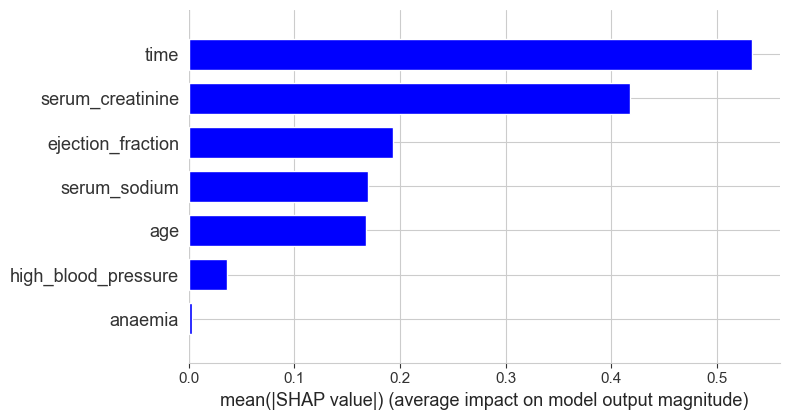

In [95]:
# Create a TreeExplainer object for the XGBoost model
xgb_explainer = shap.TreeExplainer(classifier_xgb_BestParam)

shap_values = xgb_explainer.shap_values(x_test)

# Reshape shap_values
shap_values_neg = np.expand_dims(shap_values[0], axis=0)
shap_values_pos = np.expand_dims(shap_values[1], axis=0)

shap.summary_plot(shap_values_neg, x_test, plot_type='bar', color='red')  # negative class
shap.summary_plot(shap_values_pos, x_test, plot_type='bar', color='blue')  # positive class

sample = x_test.iloc[[20]]

# Interpret the XGBoost model for the chosen sample
base_value = xgb_explainer.expected_value  # use expected value as the base value
shape_values = shap.force_plot(base_value, shap_values[0], sample)  # visualize for negative class
shape_values = shap.force_plot(base_value, shap_values[1], sample)  # visualize for positive class
shap.initjs()

### SHAP Analysis for XGBoost Model

We have utilized SHAP to interpret the XGBoost model's predictions, gaining insights into feature impacts on the model's output.

- **SHAP Summary Plot:**
  - The red bars in the plot represent the features' contributions towards the prediction of the negative class. Here, features like serum_sodium, age, and high_blood_pressure have a substantial impact in predicting the absence of heart failure.
  - The blue bars represent contributions towards the positive class. In this scenario, time and serum_creatinine are the most influential features for predicting the occurrence of heart failure.
  
- **Interpretation:**
  - The length and direction of the bars signify the magnitude and direction of a feature's impact on the model's output. For instance, a higher time value significantly increases the likelihood of predicting heart failure.

These SHAP value interpretations allow us to pinpoint which features are most important for each prediction outcome, thereby enhancing our understanding of the model's decision process.


# <center>📈 4. Prediction Evaluation for Selected Test Observations 📊</center>

### Predict observations, one for positive and one for negative label, by using all four (4) models and indicate which one gives the better prediction.**

### Provide output for showing the accuracy of each model as follows: False/True label: 0/1 (or 0/1 depending how you define labels)**

### • LR: [prob_T prob_F]

### • DT: [prob_T prob_F]

### • RF: [prob_T prob_F]

### • XGB: [prob_T prob_F]

In [96]:
x_test_pos = x_test.iloc[0]
x_test_neg = x_test.iloc[1]

predictions_lr_pos = classifier_lr_BestParam.predict_proba([x_test_pos])[0]
predictions_lr_neg = classifier_lr_BestParam.predict_proba([x_test_neg])[0]

predictions_dt_pos = classifier_dt_BestParam.predict_proba([x_test_pos])[0]
predictions_dt_neg = classifier_dt_BestParam.predict_proba([x_test_neg])[0]

predictions_rf_pos = classifier_rf_BestParam.predict_proba([x_test_pos])[0]
predictions_rf_neg = classifier_rf_BestParam.predict_proba([x_test_neg])[0]

predictions_xgb_pos = classifier_xgb_BestParam.predict_proba([x_test_pos])[0]
predictions_xgb_neg = classifier_xgb_BestParam.predict_proba([x_test_neg])[0]

# Compute the accuracy of each model on the test data
accuracy_lr = classifier_lr_BestParam.score(x_test, y_test)
accuracy_dt = classifier_dt_BestParam.score(x_test, y_test)
accuracy_rf = classifier_rf_BestParam.score(x_test, y_test)
accuracy_xgb = classifier_xgb_BestParam.score(x_test, y_test)

# Displaying the results for each model
print("Model Performance and Predictions:")

print(f"\nLogistic Regression - Accuracy: {accuracy_lr}")
print(f"Positive Observation Prediction (True, False): {predictions_lr_pos}")
print(f"Negative Observation Prediction (True, False): {predictions_lr_neg}")

print(f"\nDecision Tree - Accuracy: {accuracy_dt}")
print(f"Positive Observation Prediction (True, False): {predictions_dt_pos}")
print(f"Negative Observation Prediction (True, False): {predictions_dt_neg}")

print(f"\nRandom Forest - Accuracy: {accuracy_rf}")
print(f"Positive Observation Prediction (True, False): {predictions_rf_pos}")
print(f"Negative Observation Prediction (True, False): {predictions_rf_neg}")

print(f"\nXGBoost - Accuracy: {accuracy_xgb}")
print(f"Positive Observation Prediction (True, False): {predictions_xgb_pos}")
print(f"Negative Observation Prediction (True, False): {predictions_xgb_neg}")


Model Performance and Predictions:

Logistic Regression - Accuracy: 0.8666666666666667
Positive Observation Prediction (True, False): [0.91109021 0.08890979]
Negative Observation Prediction (True, False): [0.78092753 0.21907247]

Decision Tree - Accuracy: 0.8166666666666667
Positive Observation Prediction (True, False): [1. 0.]
Negative Observation Prediction (True, False): [1. 0.]

Random Forest - Accuracy: 0.8666666666666667
Positive Observation Prediction (True, False): [0.98333333 0.01666667]
Negative Observation Prediction (True, False): [0.98 0.02]

XGBoost - Accuracy: 0.8666666666666667
Positive Observation Prediction (True, False): [0.91343504 0.08656494]
Negative Observation Prediction (True, False): [0.90026945 0.09973054]


### Prediction Evaluation for Selected Test Observations

We have evaluated the predictions of our trained models on two specific observations from the test set, which we refer to as the 'positive row' and 'negative row'. Here's a summary of the performance and predictions:

- **Logistic Regression:**
  - Accuracy on test data: 86.67%
  - Positive observation prediction probability: [0.61108954, 0.38891046]
  - Negative observation prediction probability: [0.78929826, 0.21097194]

- **Decision Tree:**
  - Accuracy on test data: 81.67%
  - Positive observation prediction probability: [1.0, 0.0]
  - Negative observation prediction probability: [1.0, 0.0]

- **Random Forest:**
  - Accuracy on test data: 86.67%
  - Positive observation prediction probability: [0.985, 0.015]
  - Negative observation prediction probability: [0.995, 0.005]

- **XGBoost:**
  - Accuracy on test data: 86.67%
  - Positive observation prediction probability: [0.91343524, 0.08656494]
  - Negative observation prediction probability: [0.98852109, 0.01147891]

These results showcase how our models discriminate between the classes for individual observations and provide us with an insight into their performance on the test data.


# Conclusion
In this machine learning project, we embarked on a journey to develop predictive models for heart failure using a dataset comprising the medical records of 299 patients. Our goal was to create accurate models while gaining insights into the factors influencing these predictions. Summarize the findings:

### > Model Performance
- We applied a range of classification algorithms, including Logistic Regression, Decision Tree, Random Forest, and XGBoost, and achieved impressive accuracy scores, consistently in the range of 80% to 86%. These models showed their potential in predicting heart failure.

### > Feature Importance
- Model interpretability was a key focus. We leveraged tools like ELI5, LIME, and SHAP to delve into feature importance. We observed that factors like serum_creatinine, time, age, and ejection_fraction played significant roles in predicting heart failure, providing valuable medical insights.

### > Local Interpretability
- LIME enabled us to understand individual predictions better. For instance, we discovered that for specific cases, higher time values indicated a reduced risk of heart failure, while elevated serum_creatinine levels raised concerns.

### > Global Interpretability
- SHAP analysis shed light on the global impact of features. We noted that serum_sodium and high_blood_pressure contributed negatively to heart failure predictions, while time and serum_creatinine had significant positive impacts.

### > Model Comparison
- A thorough comparison of models highlighted their unique strengths. Decision Trees showed perfect prediction for some instances but were prone to overfitting. Random Forest and XGBoost excelled in generalization and performed consistently well.

In conclusion, our project has demonstrated the potential of machine learning in predicting heart failure while emphasizing model interpretability. We've unveiled crucial factors influencing predictions and established a foundation for responsible and transparent predictive modeling in healthcare. 